# Table of Contents

1. Motivation


2. Objectives


3. Data loading


4. Data cleaning

  4.a. Missing values
  

5. Data exploration

  5.a. Outliers
  

6. Feature engineering
  
    6.a. Indentifying linearity
     
        6.a.1. Linear relationship
        
    6.b. Identiying multicollinearity
    
       6.b.1. Detection of correlated parameters
        
        6.b.1.1. Data descision to addres multicollinearity
        
       6.b.2.  Heat map 
        
    6.c. Identifying categorial and continuous variables
    
    6.d. Log transformation and data normalization
    
    6.e. One-hot encoding categorial columns
    
    
7. Linear regression

     7.a. Preliminary analysis
     
    
8. Multiple linear regression

    8.a. Baseline model using statsmodel
    
    8.b. sklearn baseline model
    
    
9. Model 1- Predict Price Model


10. Model 2- Home Interior Model


11. Model 3- Exterior Geographic Features Model


12. Model 4- Increase Sale Price Model


13. Data Interpretation


  13.a. Model 1- Sale Price Predition
    
    13.a.1. Visualization for the house square footage
    
    13.a.2. Visualization for the house grade
    
  13.b. Model 3- Important geographic features vs price sale

    13.b.1. Visualization for the location of the house

    13.b.2. Visualization for the house view
    
  13.c. Model 2- Important house interior features vs sale price
   
    13.c.1. Visualization for house grade
    
    13.c.2. Visualization for the square footage of the house
    
    13.c.3. visualization fo the year of renovation of the house
    
  13.d. Model 4- Important features to predict the increase in sale price of the houses
     
    13.d.1. Visualization for square footage of the house
    
    13.d.2. Visualization for the house grade
    
    13.d.3. Visualization for the house latitude location
    
    13.d.4. Visualization of the house view
    
    13.d.5. Visualization of the house waterfront
    
    
14. Conclusion






# King County Housing Analysis




# 1. Motivation

Property adviser in a real estate company. Recommendations will be provided for real estate investors/companies to predict the price and incearse the sale price, inorder to increase profits and avoid financial loses. 


# 2. Objectives


1-What are the important key factors to predict the price of the property?

2-How home interior can affect the house value?

3-How geographic features affect  property values?

4-What are important features to increase the value of the property?






# 3. Data loading

In [13]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures



In [14]:
#Load data and check correct format
### Convert ? to  NaN 
df= pd.read_csv('kc_house_data.csv', na_values='?')

#Data abbreviations description
### Column names 
id - unique identified for a house
date - Date house was sold
price - Price is prediction target
bedrooms - Number of Bedrooms/House
bathrooms - Number of bathrooms/bedrooms
sqft_living - Square footage of the home
sqft_lot - Square footage of the lot
floors - Total floors (levels) in house
waterfront - House which has a view to a waterfront
view - If the house has a view or not
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zipcode of the house
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [1]:
#features = df.iloc[:,:-1]
#target=df['price']
#features.head(10)

In [8]:
df.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0         NaN   0.0  ...      7        1180            0.0   
1       7242     2.0         0.0   0.0  ...      7        2170          400.0   
2      10000     1.0         0.0   0.0  ...      6         770            0.0   
3       5000     1.0         0.0   0.0  ...      7        1050          910.0   
4       8080     1.0         0.0   0.0  ...      8        1680            0.0   
5     101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6       6819     2.0         0.0   0.0  ...      7        1715            NaN   
7       9711     1.0         0.0   NaN  ...      7        1060            0.0   
8       7470     1.0         0.0   0.0  ...      7        1050          730.0   
9       6560     2.0         0.0   0.0  ...      7        1890            0.0   
10      9796     1.0         NaN   0.0  ...      8        1860         1700.0   
11      6000     1.0         0.0   0.0  ...      7         860          300.0   
12     19901     1.5         0.0   0.0  ...      7        1430            0.0   
13      9680     1.0         0.0   0.0  ...      7        1370            0.0   
14      4850     1.5         0.0   0.0  ...      7        1810            0.0   
15      5000     2.0         0.0   3.0  ...      9        1980          970.0   
16     14040     2.0         0.0   0.0  ...      7        1890            0.0   
17      4300     1.5         0.0   0.0  ...      7        1600            0.0   
18      9850     1.0         0.0   0.0  ...      7        1200            NaN   
19      9774     1.0         0.0   0.0  ...      7        1250            0.0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955           0.0    98178  47.5112 -122.257           1340   
1       1951        1991.0    98125  47.7210 -122.319           1690   
2       1933           NaN    98028  47.7379 -122.233           2720   
3       1965           0.0    98136  47.5208 -122.393           1360   
4       1987           0.0    98074  47.6168 -122.045           1800   
5       2001           0.0    98053  47.6561 -122.005           4760   
6       1995           0.0    98003  47.3097 -122.327           2238   
7       1963           0.0    98198  47.4095 -122.315           1650   
8       1960           0.0    98146  47.5123 -122.337           1780   
9       2003  

#### Information about Grade column
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Information derived from: https://blue.kingcounty.com/Assessor/eRealProperty/ResidentialGlossary.aspx?idx=viewall&Parcel=7960900070&AreaReport=http://www.KingCounty.gov/depts/Assessor/Reports/area-reports/2019/residential-northeast/033.aspx#BuildingGrade

In [353]:
df.shape

(21597, 21)

# 4. Data cleaning

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Columns with missing values: waterfront, view, sqft_basement, yr_renovated

In [9]:
#Checking for missing values
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [10]:
df.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [3]:
df[df.bedrooms ==33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0      1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [15]:
#Change 33 bedrooms house to 3 bedrooms house
df['bedrooms'].replace(to_replace=33, value=3, inplace= True)

In [4]:
##Replace 0 with difference between sqft_above and sqft_living if any?
#df['sqft_basement'].replace(to_replace='0', value= abs(df['sqft_living']-df['sqft_above']), inplace=True)

In [355]:
df['sqft_basement'].nunique()

303

## 4.a. Missing values

In [16]:
##Replace missing values
features1=['waterfront', 'view']
features2=['yr_renovated', 'sqft_basement']

for value in features1:
    mode=df[value].mode()[0]
    df[value].fillna(mode, inplace=True)
    
for value in features2:
    median=df[value].median()
    df[value].fillna(median, inplace=True)

In [5]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [20]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df['view'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: view, Length: 21597, dtype: bool

In [22]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [32]:
df['view'].nunique()

5

In [30]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [31]:
df['waterfront'].nunique()

2

In [17]:
#transform date dtype 'object' to date fromat
df['date']=pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [18]:
#Drop id column
df=df.drop(['id'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [28]:
df.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13   221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09   538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25   180000.0         2       1.00          770     10000     1.0   
3 2014-12-09   604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18   510000.0         3       2.00         1680      8080     1.0   
5 2014-05-12  1230000.0         4       4.50         5420    101930     1.0   
6 2014-06-27   257500.0         3       2.25         1715      6819     2.0   
7 2015-01-15   291850.0         3       1.50         1060      9711     1.0   
8 2015-04-15   229500.0         3       1.00         1780      7470     1.0   
9 2015-03-12   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   
5         0.0   0.0          3     11        3890         1530.0      2001   
6         0.0   0.0          3      7        1715            0.0      1995   
7         0.0   0.0          3      7        1060            0.0      1963   
8         0.0   0.0          3      7        1050          730.0      1960   
9         0.0   0.0          3      7        1890            0.0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           0.0    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503  
5           0.0    98053  47.6561 -122.005           4760      101930  
6           0.0    98003  47.3097 -122.327           2238        6819  
7           0.0    98198  47.4095 -122.315           1650        9711  
8           0.0    98146  47.5123 -122.337           1780        8113  
9           0.0    98038  47.3684 -122.031           2390        7570

In [33]:
#Double check if anything is missing
df.isna().sum().any().any()

False

In [11]:
df.describe().round(2)

price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count    21597.00  21597.00   21597.00     21597.00    21597.00  21597.00   
mean    540296.57      3.37       2.12      2080.32    15099.41      1.49   
std     367368.14      0.90       0.77       918.11    41412.64      0.54   
min      78000.00      1.00       0.50       370.00      520.00      1.00   
25%     322000.00      3.00       1.75      1430.00     5040.00      1.00   
50%     450000.00      3.00       2.25      1910.00     7618.00      1.50   
75%     645000.00      4.00       2.50      2550.00    10685.00      2.00   
max    7700000.00     11.00       8.00     13540.00  1651359.00      3.50   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    21597.00  21597.00   21597.00  21597.00    21597.00       21597.00   
mean         0.01      0.23       3.41      7.66     1788.60         285.72   
std          0.08      0.76       0.65      1.17      827.76         439.82   
min          0.00      0.00       1.00      3.00      370.00           0.00   
25%          0.00      0.00       3.00      7.00     1190.00           0.00   
50%          0.00      0.00       3.00      7.00     1560.00           0.00   
75%          0.00      0.00       4.00      8.00     2210.00         550.00   
max          1.00      4.00       5.00     13.00     9410.00        4820.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21597.00      21597.00  21597.00  21597.00  21597.00       21597.00   
mean    1971.00         68.76  98077.95     47.56   -122.21        1986.62   
std       29.38        364.04     53.51      0.14      0.14         685.23   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15  
count    21597.00  
mean     12758.28  
std      27274.44  
min        651.00  
25%       5100.00  
50%       7620.00  
75%      10083.00  
max     871200.00

## 5. Data exploration
Check if the distributions of continuous variables are normal. We can check if there is a high skewness or/and kurtosis.

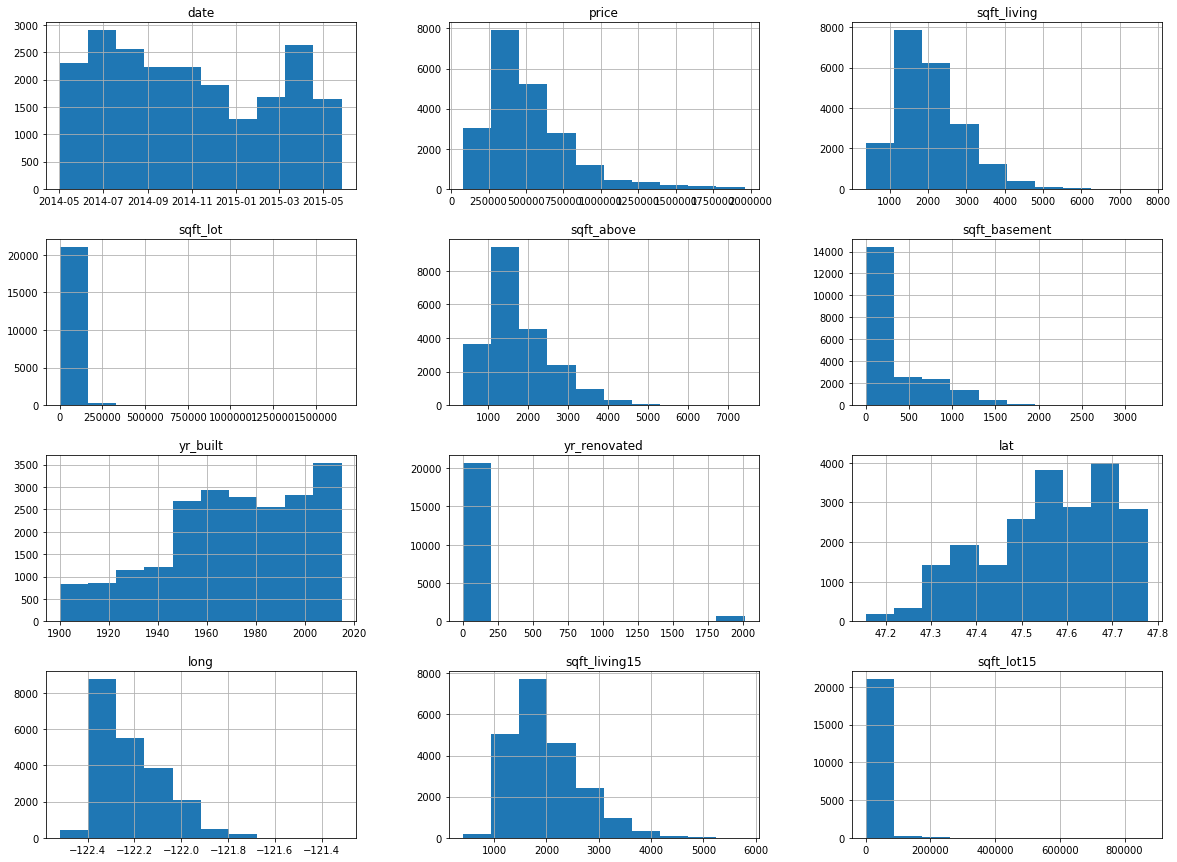

In [348]:
#Quick check for the distributions if it is normal or not
df.hist(figsize=(20, 15));

Most of the distributions are skewed and do not obey normal distribution.

## 5.a. Outliers
There are  a few of vey expensive homes as outliers. I decided to get rid of 0.1 % of the data

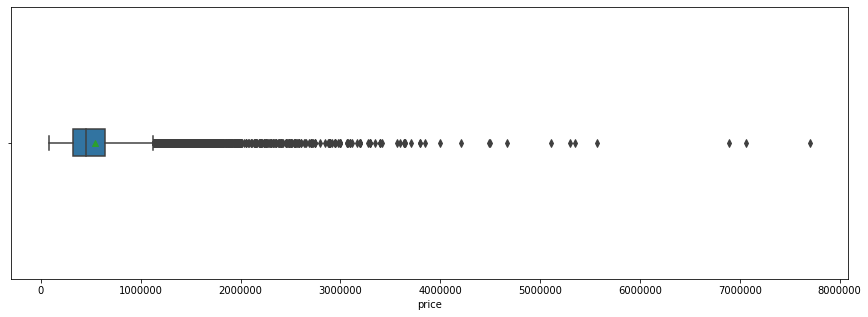

In [13]:
#Check for outliers
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(x='price', data=df, orient='h', width=0.1, showmeans=True, ax=ax)
           
plt.show()

It looks like outliers represent homes that are more than 6,000000$

In [7]:
#Get rid of outliers
outliers=df[(df['price'])>=7500000].index
df.drop(outliers, inplace=True)

In [19]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [20]:
orig_tot = len(df)
df = df[df.price <1970000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)

Percent removed: 0.010047691809047552


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219986FF688>,
      dtype=object)

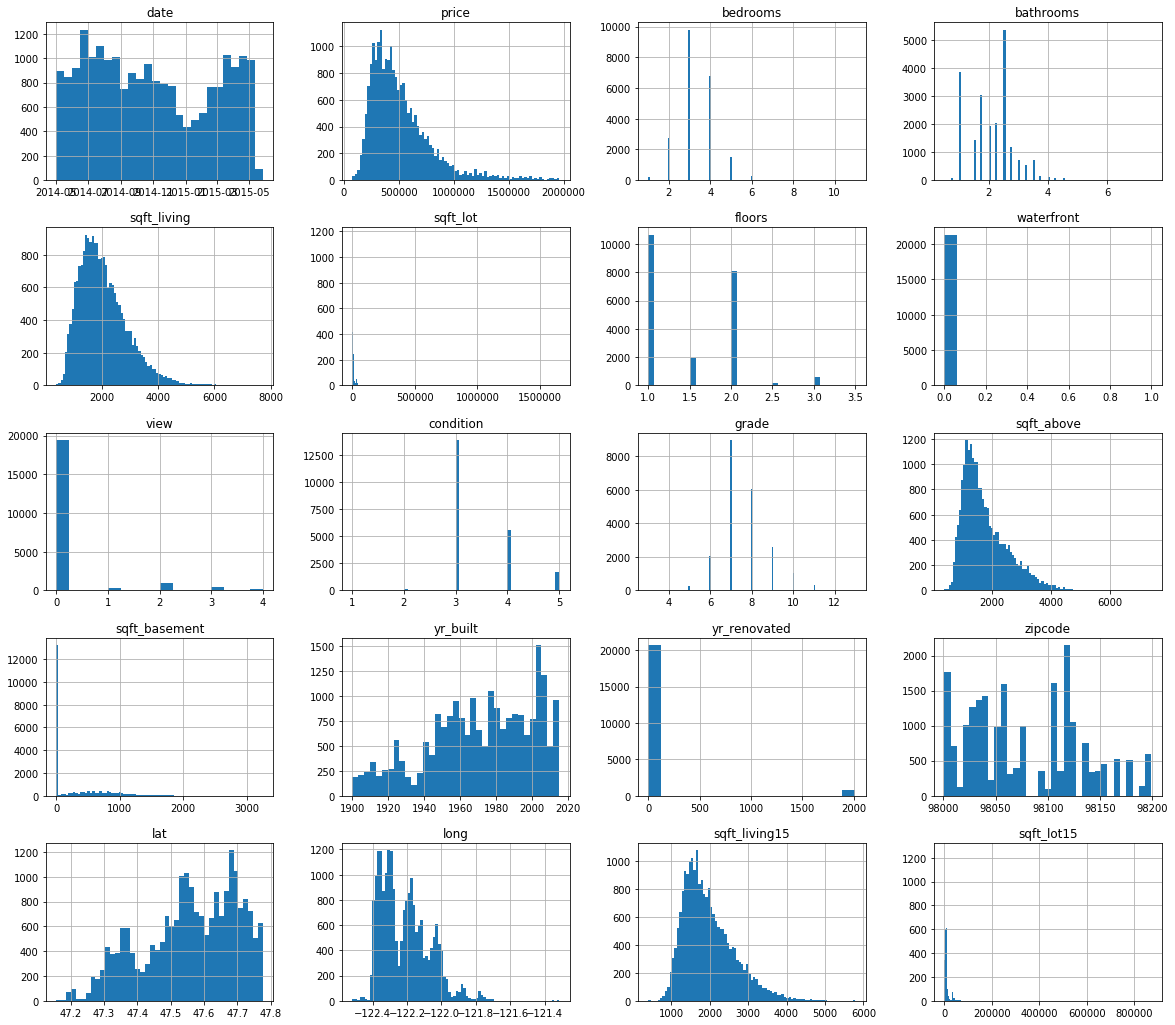

In [19]:
#Plot again histograms for all variables in the dataset
df.hist(figsize=(20, 18), bins='auto')

#### Most of these distributions are skewed, one way to ameloirate for skewed distribution is log transformations.
We can also distiguish continuous variables for categorials.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

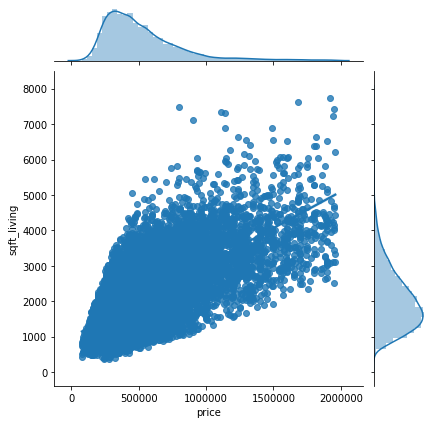

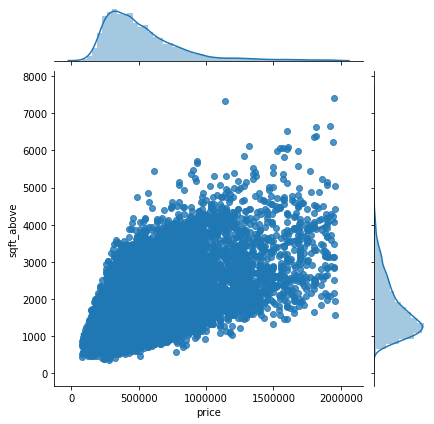

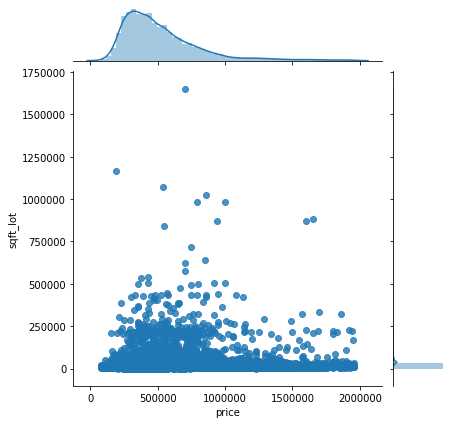

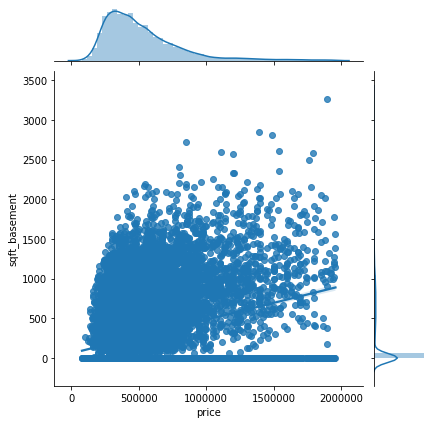

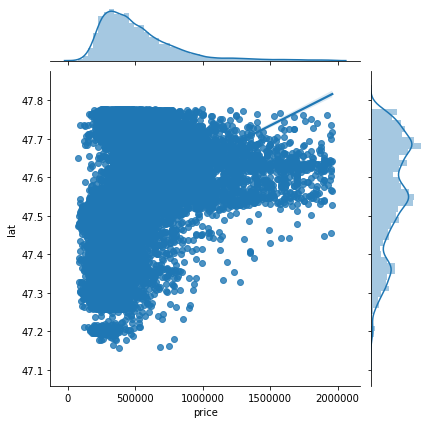

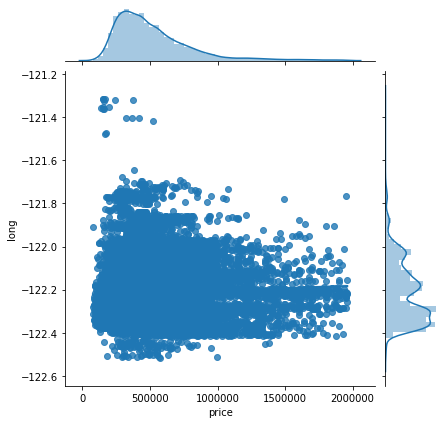

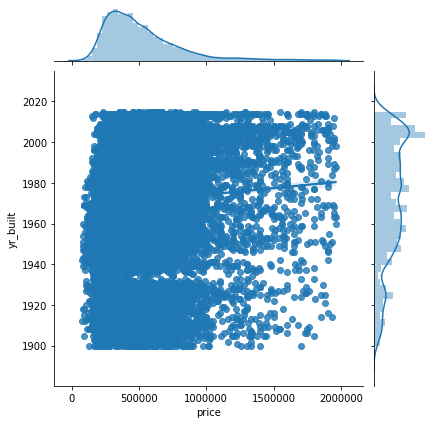

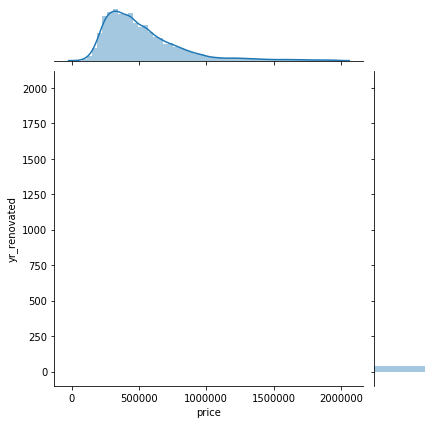

In [11]:
#check for linearity and plot some single variable regression plots of each feature against the target variable using seaborn.
sns.jointplot('price','sqft_living', data=df, kind='reg');
sns.jointplot('price','sqft_above', data=df, kind='reg');
sns.jointplot('price','sqft_lot', data=df, kind='reg');
sns.jointplot('price','sqft_basement', data=df, kind='reg');
sns.jointplot('price','lat', data=df, kind='reg');
sns.jointplot('price','long', data=df, kind='reg');
sns.jointplot('price','yr_built', data=df, kind='reg');
sns.jointplot('price','yr_renovated', data=df, kind='reg');
sns.jointplot('price','zipcode', data=df, kind='reg');

#### It looks like from initial investigations, sqft_living, sqft_above are linear.

# 6. Feature Engineering


## 6.a. Identifying linearity
The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

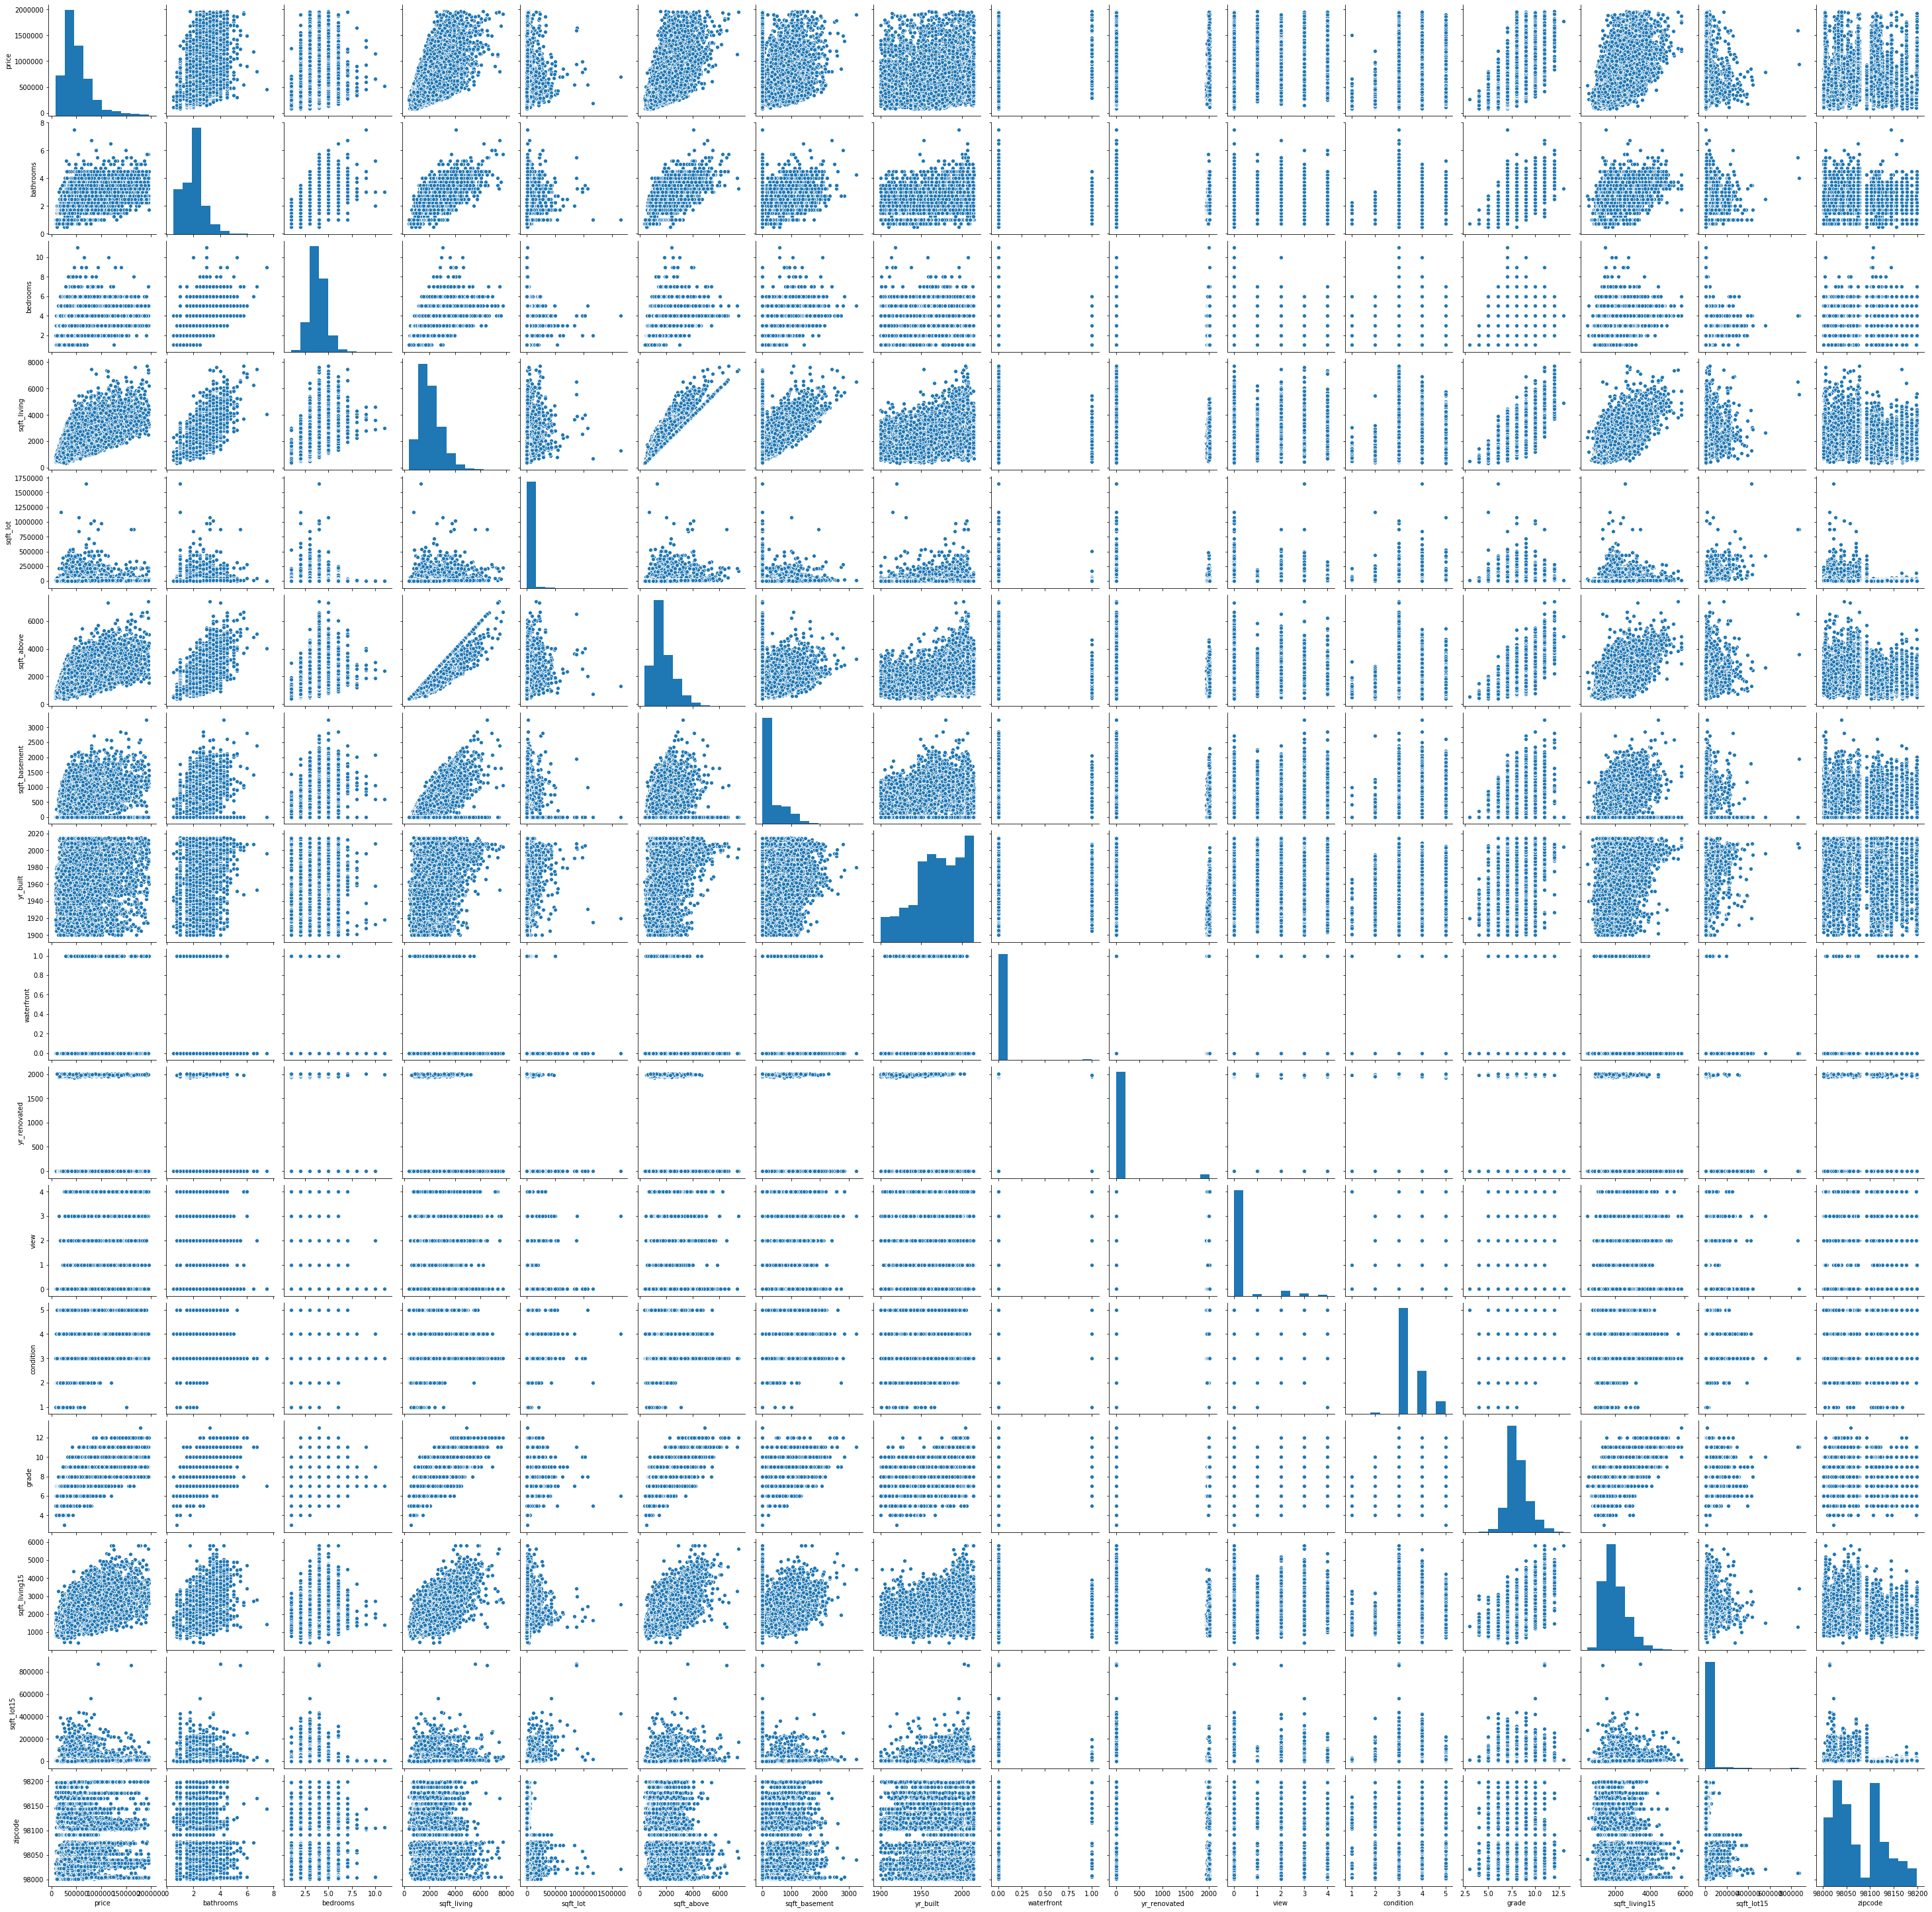

In [362]:
df_plot = df[['price', 'bathrooms','bedrooms' ,'sqft_living', 'sqft_lot', 'sqft_above',
              'sqft_basement', 'yr_built','waterfront', "yr_renovated", 'view','condition','grade','sqft_living15', 'sqft_lot15','zipcode']].copy()
sns.pairplot(df_plot)
plt.show()

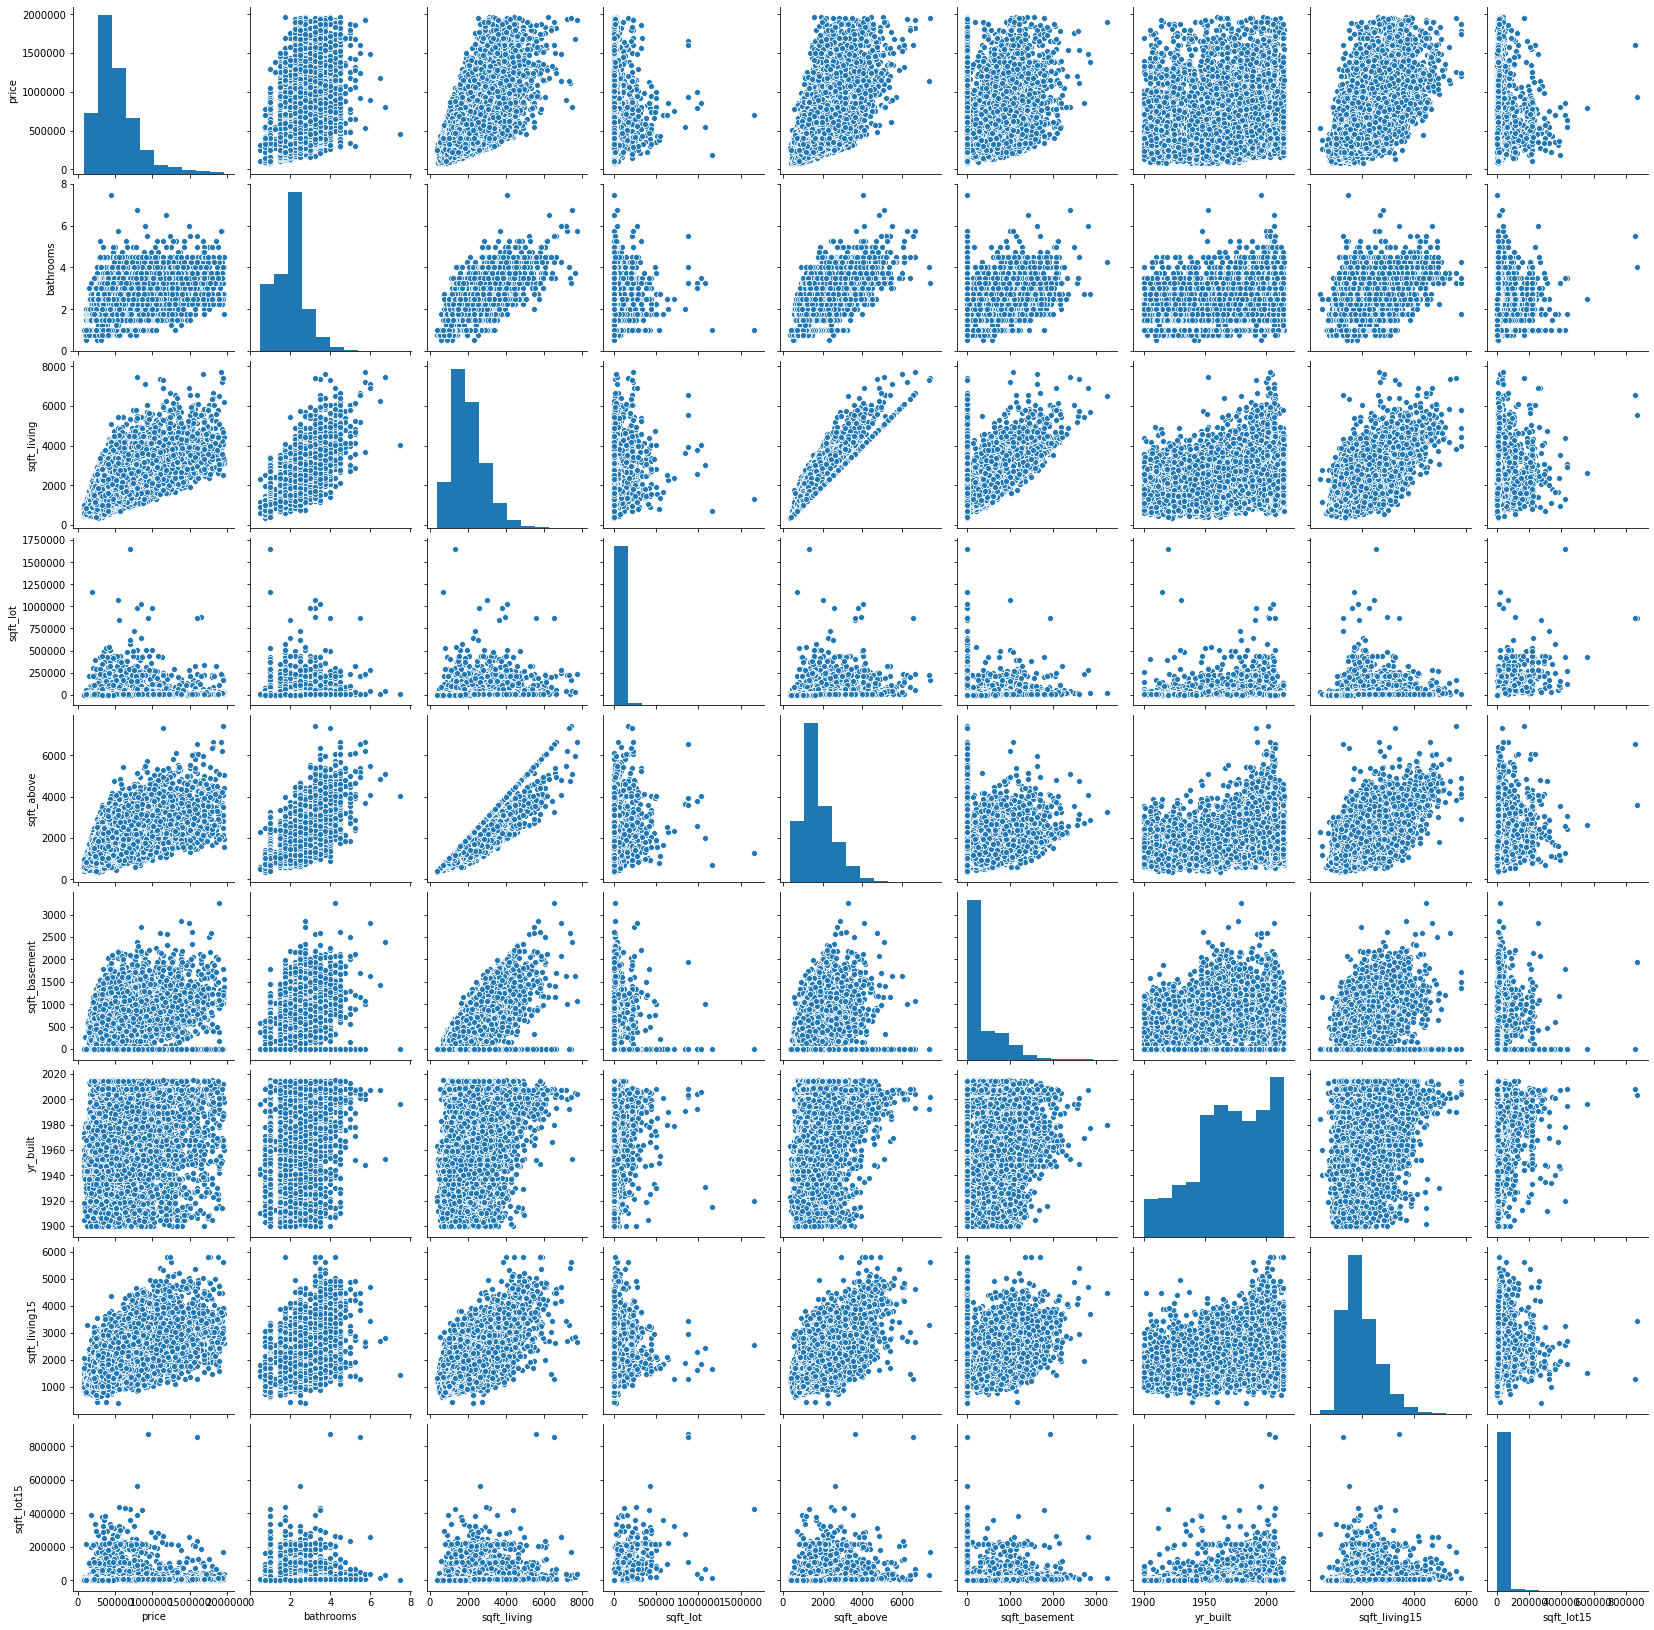

In [364]:
#Remove categorial variables for better visualization and linearity
df_plot = df[['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
              'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].copy()
sns.pairplot(df_plot)
plt.show()

### 6.a.1. Linear relationship
When we check the linearity of parameters we see that 'price' has a linear relationship with other columns except 'yr_built'. There is a strong linear relationship between the price and sqft_living, sqft_above, sqft_basement, bathrooms, sqft_living15.
We need to check the distributions one by one to avoid multicollinearity. We can eliminate these columns by checking their p values.

## 6.b. Identifying multicollinearity
Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity is a problem because it undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant.

In [367]:
#Identifying multicollinearity
features = df.drop(['price'], axis=1)
target=df['price']
features.head(10)


date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0         0.0   
1 2014-12-09         3       2.25         2570      7242     2.0         0.0   
2 2015-02-25         2       1.00          770     10000     1.0         0.0   
3 2014-12-09         4       3.00         1960      5000     1.0         0.0   
4 2015-02-18         3       2.00         1680      8080     1.0         0.0   
5 2014-05-12         4       4.50         5420    101930     1.0         0.0   
6 2014-06-27         3       2.25         1715      6819     2.0         0.0   
7 2015-01-15         3       1.50         1060      9711     1.0         0.0   
8 2015-04-15         3       1.00         1780      7470     1.0         0.0   
9 2015-03-12         3       2.50         1890      6560     2.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   
5   0.0          3     11        3890         1530.0      2001           0.0   
6   0.0          3      7        1715            0.0      1995           0.0   
7   0.0          3      7        1060            0.0      1963           0.0   
8   0.0          3      7        1050          730.0      1960           0.0   
9   0.0          3      7        1890            0.0      2003           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503  
5    98053  47.6561 -122.005           4760      101930  
6    98003  47.3097 -122.327           2238        6819  
7    98198  47.4095 -122.315           1650        9711  
8    98146  47.5123 -122.337           1780        8113  
9    98038  47.3684 -122.031           2390        7570

### 7.b.1.  Detection of correlated parameters

In [368]:
#Select only significant correlations greater than 0.75
abs(features.corr()) > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
bedrooms           True      False        False     False   False       False   
bathrooms         False       True        False     False   False       False   
sqft_living       False      False         True     False   False       False   
sqft_lot          False      False        False      True   False       False   
floors            False      False        False     False    True       False   
waterfront        False      False        False     False   False        True   
view              False      False        False     False   False       False   
condition         False      False        False     False   False       False   
grade             False      False        False     False   False       False   
sqft_above        False      False         True     False   False       False   
sqft_basement     False      False        False     False   False       False   
yr_built          False      False        False     False   False       False   
yr_renovated      False      False        False     False   False       False   
zipcode           False      False        False     False   False       False   
lat               False      False        False     False   False       False   
long              False      False        False     False   False       False   
sqft_living15     False      False         True     False   False       False   
sqft_lot15        False      False        False     False   False       False   

                view  condition  grade  sqft_above  sqft_basement  yr_built  \
bedrooms       False      False  False       False          False     False   
bathrooms      False      False  False       False          False     False   
sqft_living    False      False  False        True          False     False   
sqft_lot       False      False  False       False          False     False   
floors         False      False  False       False          False     False   
waterfront     False      False  False       False          False     False   
view            True      False  False       False          False     False   
condition      False       True  False       False          False     False   
grade          False      False   True       False          False     False   
sqft_above     False      False  False        True          False     False   
sqft_basement  False      False  False       False           True     False   
yr_built       False      False  False       False          False      True   
yr_renovated   False      False  False       False          False     False   
zipcode        False      False  False       False          False     False   
lat            False      False  False       False          False     False   
long           False      False  False       False          False     False   
sqft_living15  False      False  False       False          False     False   
sqft_lot15     False      False  False       False          False     False   

               yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
bedrooms              False    False  False  False          False       False  
bathrooms             False    False  False  False          False       False  
sqft_living           False    False  False  False           True       False  
sqft_lot              False    False  False  False          False       False  
floors                False    False  False  False          False       False  
waterfront            False    False  False  False          False       False  
view                  False    False  False  False          False       False  
condition             False    False  False  False          False       False  
grade                 False    False  False  False          False       False  
sqft_above            False    False  False  False          False       False  
sqft_basement         False    False  False  False          False       False  
yr_built     

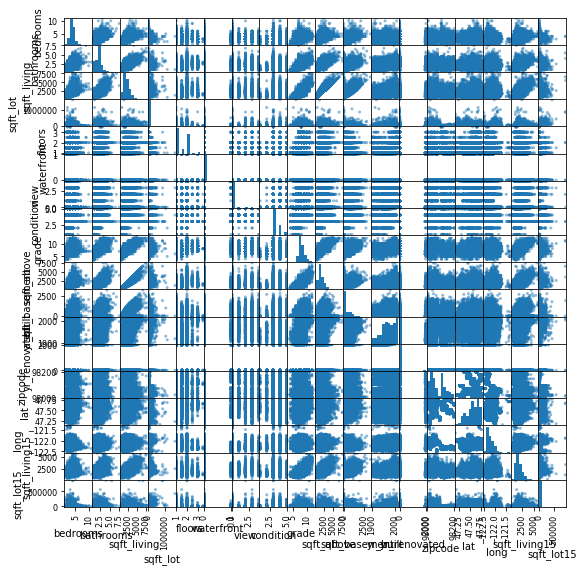

In [369]:
pd.plotting.scatter_matrix(features,figsize  = [9, 9]);
plt.show()

In [16]:
features.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.520266     0.596904  0.033559  0.176499   
bathrooms      0.520266   1.000000     0.742046  0.085805  0.505652   
sqft_living    0.596904   0.742046     1.000000  0.175440  0.353499   
sqft_lot       0.033559   0.085805     0.175440  1.000000 -0.007385   
floors         0.176499   0.505652     0.353499 -0.007385  1.000000   
waterfront    -0.023221   0.016053     0.032656  0.020010  0.006936   
view           0.063171   0.148946     0.236321  0.074192  0.014150   
condition      0.020488  -0.133265    -0.067549 -0.007640 -0.268944   
grade          0.354474   0.649476     0.748010  0.111272  0.459541   
sqft_above     0.485556   0.668753     0.867559  0.184498  0.528760   
sqft_basement  0.295411   0.250454     0.399329  0.011542 -0.261020   
yr_built       0.164972   0.523841     0.338997  0.051817  0.496309   
yr_renovated   0.015194   0.040291     0.038531  0.004892  0.001986   
zipcode       -0.158676  -0.205942    -0.204762 -0.131171 -0.060486   
lat           -0.016904   0.015291     0.041677 -0.087774  0.046495   
long           0.141103   0.236582     0.263107  0.229421  0.129084   
sqft_living15  0.396702   0.555616     0.754853  0.146153  0.276571   
sqft_lot15     0.031123   0.085040     0.185815  0.713360 -0.012970   

               waterfront      view  condition     grade  sqft_above  \
bedrooms        -0.023221  0.063171   0.020488  0.354474    0.485556   
bathrooms        0.016053  0.148946  -0.133265  0.649476    0.668753   
sqft_living      0.032656  0.236321  -0.067549  0.748010    0.867559   
sqft_lot         0.020010  0.074192  -0.007640  0.111272    0.184498   
floors           0.006936  0.014150  -0.268944  0.459541    0.528760   
waterfront       1.000000  0.334788   0.015470  0.029890    0.014983   
view             0.334788  1.000000   0.040966  0.209485    0.122372   
condition        0.015470  0.040966   1.000000 -0.156172   -0.169202   
grade            0.029890  0.209485  -0.156172  1.000000    0.742578   
sqft_above       0.014983  0.122372  -0.169202  0.742578    1.000000   
sqft_basement    0.037216  0.243743   0.170528  0.129133   -0.101192   
yr_built        -0.036316 -0.059422  -0.359311  0.463965    0.443685   
yr_renovated     0.073972  0.085053  -0.056033  0.005925    0.010494   
zipcode          0.043883  0.093153  -0.000438 -0.186879   -0.267224   
lat             -0.024307 -0.004155  -0.016107  0.107141   -0.013061   
long            -0.049498 -0.077737  -0.104266  0.212985    0.366781   
sqft_living15    0.041711  0.247899  -0.101137  0.703490    0.727922   
sqft_lot15       0.028138  0.070479  -0.001993  0.117582    0.194759   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
bedrooms            0.295411  0.164972      0.015194 -0.158676 -0.016904   
bathrooms           0.250454  0.523841      0.040291 -0.205942  0.015291   
sqft_living         0.399329  0.338997      0.038531 -0.204762  0.041677   
sqft_lot            0.011542  0.051817      0.004892 -0.131171 -0.087774   
floors             -0.261020  0.496309      0.001986 -0.060486  0.046495   
waterfront          0.037216 -0.036316      0.073972  0.043883 -0.024307   
view                0.243743 -0.059422      0.085053  0.093153 -0.004155   
condition           0.170528 -0.359311     -0.056033 -0.000438 -0.016107   
grade               0.129133  0.463965      0.005925 -0.186879  0.107141   
sqft_above         -0.101192  0.443685      0.010494 -0.267224 -0.013061   
sqft_basement       1.000000 -0.134781      0.057147  0.079741  0.106767   
yr_built           -0.134781  1.000000     -0.200876 -0.345734 -0.149371   
yr_renovated        0.057147 -0.200876      1.000000  0.065579  0.026236   
zipcode             0.079741 -0.345734      0.065579  1.000000  0.268990   
lat                 0.106767 -0.149371      0.026236  0.268990  1.000000   
long               -0.145485  0.410749     -0.064489 -0.564807 -0.134431   
sqft

In [370]:
#include stack and zip to create a more robust solution that will return 
#the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
df=features.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [371]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                 
(sqft_living, sqft_above)     0.867559
(sqft_living15, sqft_living)  0.754853

### 6.b.1.1.  Data decision to address colinearity
There are three sets of variales that are highly correlated. we can remove sqft_living15 and sqft_above from data set
df.drop(columns=['sqft_living15',"sqft_above"], inplace=True).
For now I will keep all the features and test the performance of the model.

## 6.b.2 Heat map 

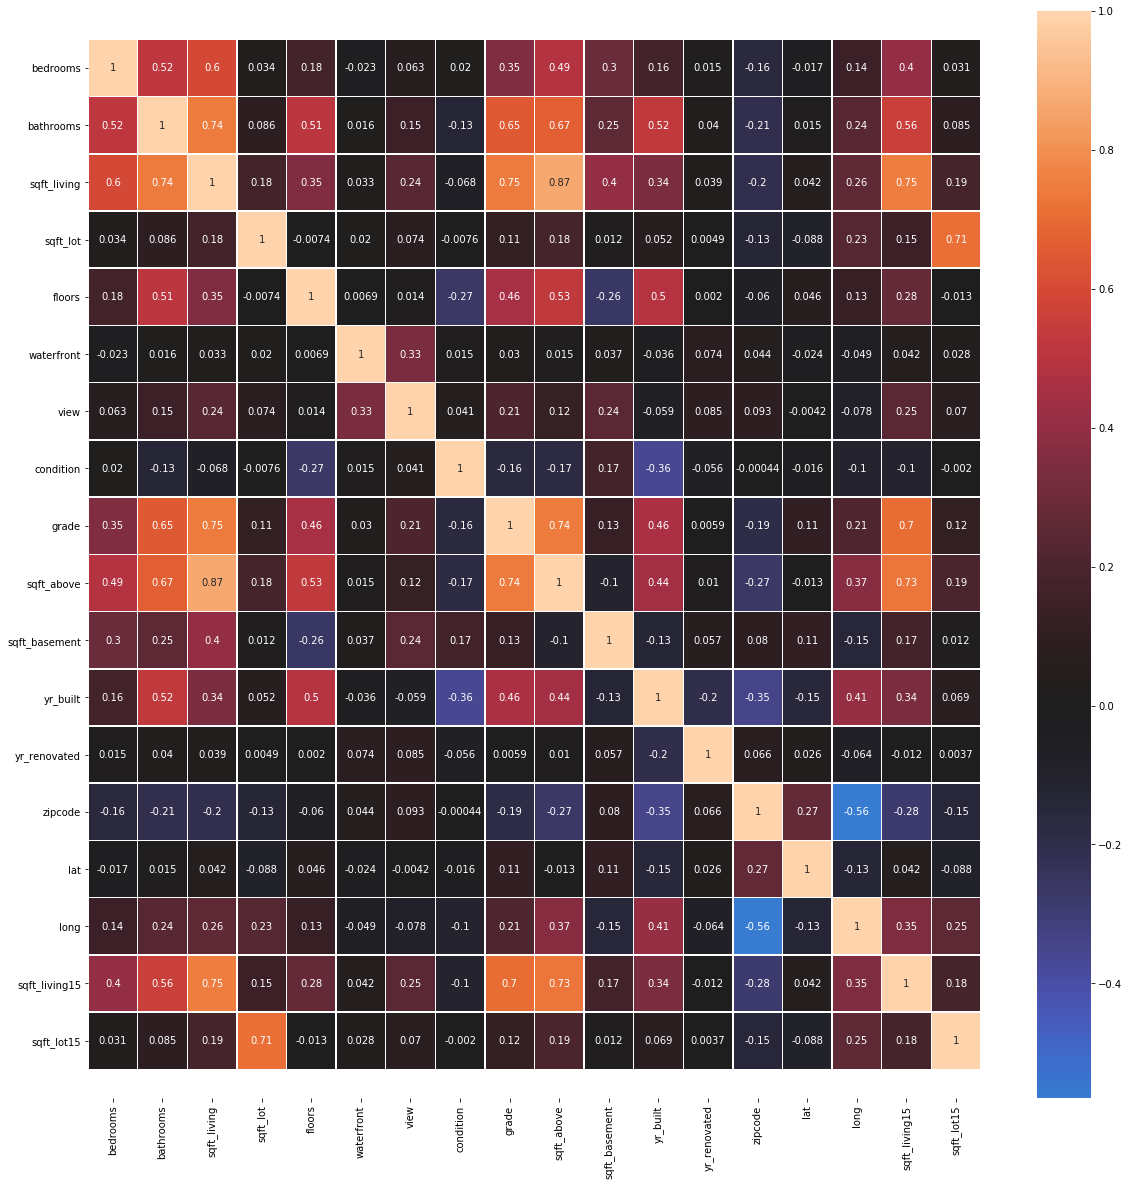

In [374]:
#Heat map
plt.figure(figsize=(20, 20))
ax = sns.heatmap(features.corr(), center=0, linewidths=.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## 6.c. Identify categorial and continuous variables 

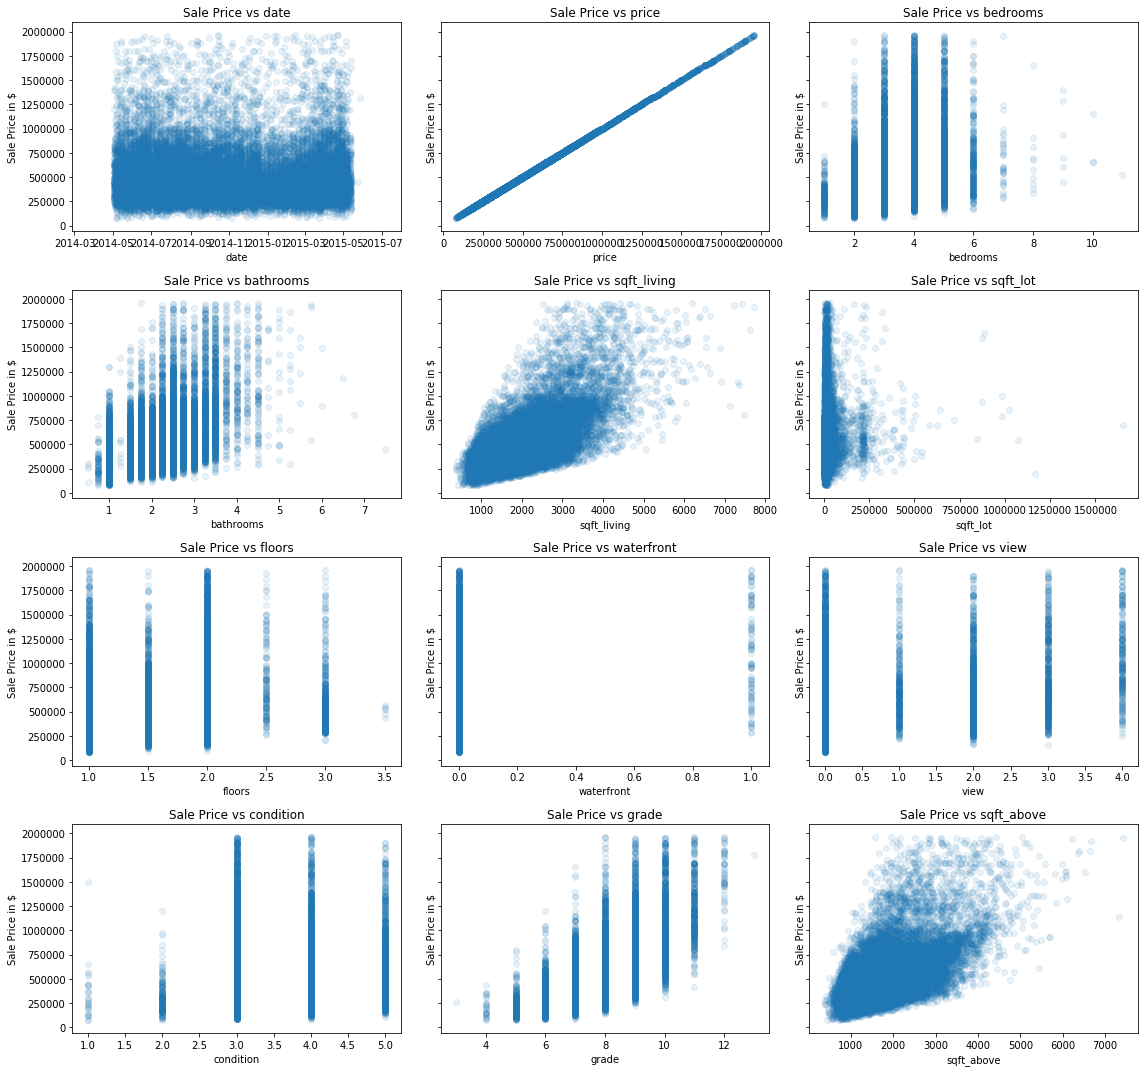

In [384]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] , label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $')

fig.tight_layout()

## 6.d. Log transformation and data normalization
Log transformation is an effective technique we can use to improve the performance of linear regression models. We make the distributions look muck normal and improve our models' predictive performance.


In [456]:
#Transformation non-normal features
#take out sqft_basement,yr_renovated, these two features after log and normalization are creating either Nan
#or infinity values I tried diffrent normalization methods and still same result.
#I decided to remove sqft_basement,yr_renovated sicnce the correlation factor in correlation matrix above shown is very week (see above).

continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
              'yr_built', 'sqft_living15', 'sqft_lot15' ]


categoricals= ['floors', 'condition','bedrooms', 'view', 'waterfront', 'bathrooms','grade', 'zipcode']

#for feat in non_normal:
    #df[feat]=df[feat].map(lambda x: np.log(x))
    
    
kc_cont = df[continuous]

#log features
log_names = [f'{column}_log' for column in kc_cont.columns]

kc_log = np.log(kc_cont)
kc_log.columns = log_names



# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm =kc_log.apply(normalize)



## 6.e. One-Hot Encoding Categorical Columns
Categorical columns: Bedrooms, bathrooms,floors, waterfront, view, grade, condition and zipcode. We change their type to 'category' and make new columns by using pandas get_dummies() function.

In [457]:
#Categorial features
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode']=df['zipcode'].astype('category')
df['bathrooms']=df['bathrooms'].astype('category')

df_dummy = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)

In [42]:
#Data normalization 
#def normalize(feature):
   # return (feature - feature.mean())/feature.std()


#for feat in ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
            # 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']:
    #df[feat] = norm_feat(df[feat])

    

In [458]:
#Combine categorial and continuous features
preprocessed = pd.concat([kc_log_norm, df_dummy], axis=1)
preprocessed.head()

price_log  sqft_living_log  sqft_lot_log  sqft_above_log  yr_built_log  \
0  -1.444792        -1.127694     -0.381175       -0.746778     -0.538117   
1   0.330701         0.747609     -0.105607        0.705282     -0.675344   
2  -1.864331        -2.156133      0.252602       -1.764245     -1.296368   
3   0.562685         0.094808     -0.516846       -1.024990     -0.196274   
4   0.223550        -0.276573      0.015941        0.095264      0.549696   

   sqft_living15_log  sqft_lot15_log  floors_1.5  floors_2.0  floors_2.5  ...  \
0          -1.031533       -0.388591           0           0           0  ...   
1          -0.312979       -0.017013           0           1           0  ...   
2           1.160623        0.049384           0           0           0  ...   
3          -0.985659       -0.539161           0           0           0  ...   
4          -0.117724       -0.039144           0           0           0  ...   

   zipcode_98146  zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0              0              1              0              0              0  
1              0              0              0              0              0  
2              0              0              0              0              0  
3              0              0              0              0              0  
4              0              0              0              0              0  

[5 rows x 135 columns]

In [43]:
# Dealing with Categorial columns
#Make sure Python recognizes these strings as category.

#df['bedrooms'] = df['bedrooms'].astype('category')
#df['floors'] = df['floors'].astype('category')
#df['waterfront'] = df['waterfront'].astype('category')
#df['view'] = df['view'].astype('category')
#df['condition'] = df['condition'].astype('category')
#df['grade'] = df['grade'].astype('category')
#df['bathrooms']=df['bathrooms'].astype('category')
#df['zipcode'] = df['zipcode'].astype('category')
#df['date'] = df['date'].astype('category')

In [12]:
#Create dummy variables for the categorial features
#feats = [ 'bedrooms', 'bathrooms',  'floors',
        # 'waterfront', 'view', 'condition', 'grade']
#df_feats = df[feats]
#df_feats_zipcode = df_feats.copy()
#df_feats = pd.get_dummies(df_feats, drop_first=True)

In [44]:
#floor_dummies = pd.get_dummies(df['floors'], prefix='floors', drop_first=True)
#condition_dummies = pd.get_dummies(df['condition'], prefix='con', drop_first=True)
#grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
#bedrooms_dummies = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)
#bathrooms_dummies = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)
#waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
#view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)

In [45]:
#df = df.drop(['floors', 'condition','bedrooms', 'view', 'waterfront', 'bathrooms','grade'], axis=1)

In [14]:
#df = pd.concat([df, view_dummies, bathrooms_dummies, waterfront_dummies,
                        #floor_dummies, 
                        #condition_dummies, 
                       # grade_dummies,
                        #bedrooms_dummies
                        #], axis=1)
#df.head()

In [32]:
df.dtypes

date           datetime64[ns]
price                 float64
sqft_living           float64
sqft_lot              float64
sqft_above            float64
                    ...      
bed_7                   uint8
bed_8                   uint8
bed_9                   uint8
bed_10                  uint8
bed_11                  uint8
Length: 75, dtype: object

In [388]:
df.keys()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 7. Linear regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 
We will start modelling our data using two variables: the target (price)  and other features to check if there is a linear relationship. The weakness of the linear regression model Weaknessesis when it performs poorly when there are non-linear relationships.

R-Squared: 0.34062439602857164
Intercept     147248.157357
sqft_above       210.060588
dtype: float64


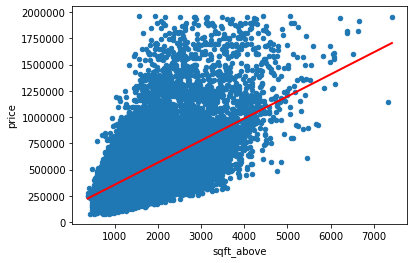

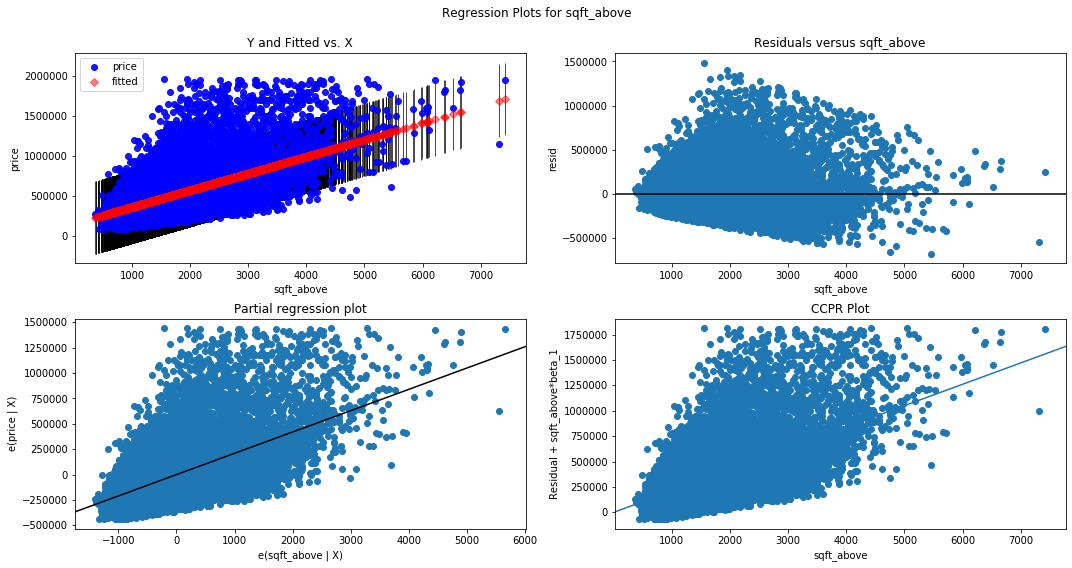

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


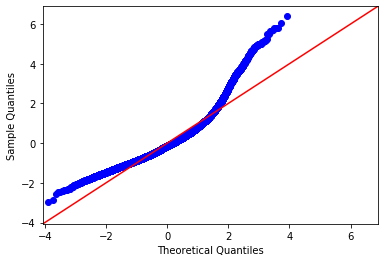

In [389]:
#Single linear regression
import statsmodels.formula.api as smf
f = 'price~sqft_above'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [df.sqft_above.min(), df.sqft_above.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.009728480794731209
Intercept    508026.025566
sqft_lot          0.685566
dtype: float64


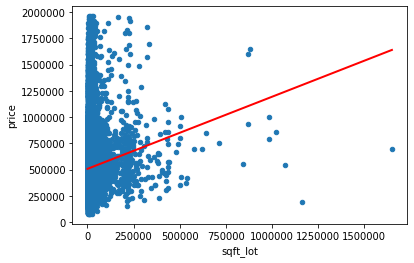

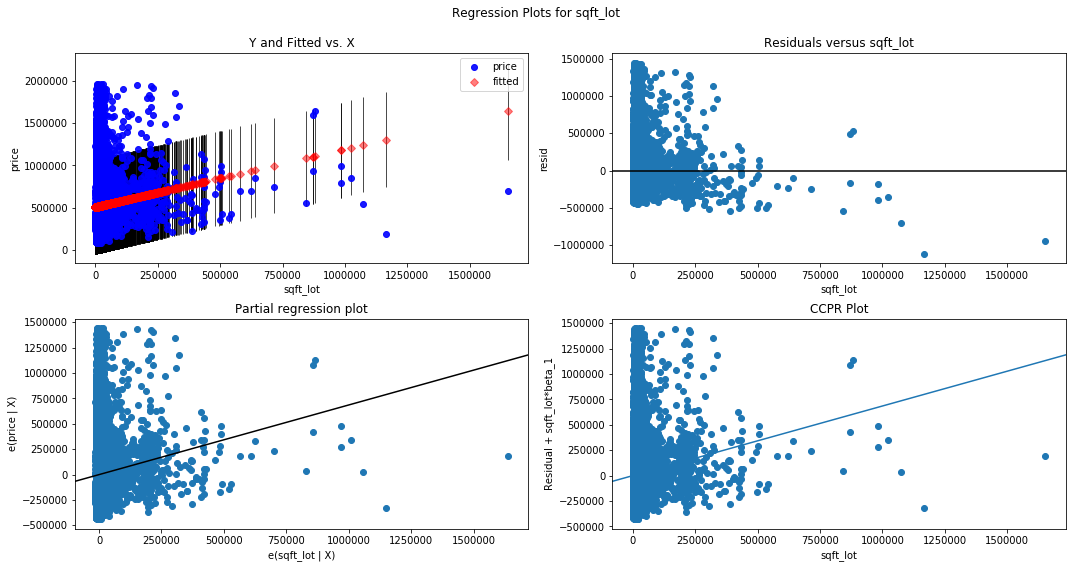

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


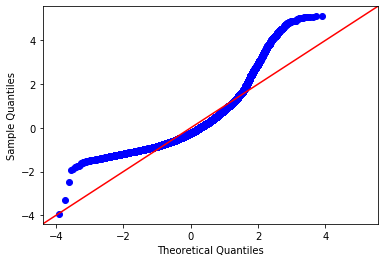

In [14]:
f = 'price~sqft_lot'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot': [df.sqft_lot.min(), df.sqft_lot.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.46050140020301855
Intercept      57988.127483
sqft_living      224.444098
dtype: float64


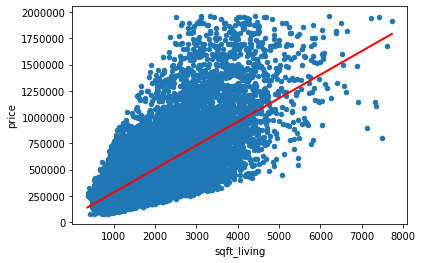

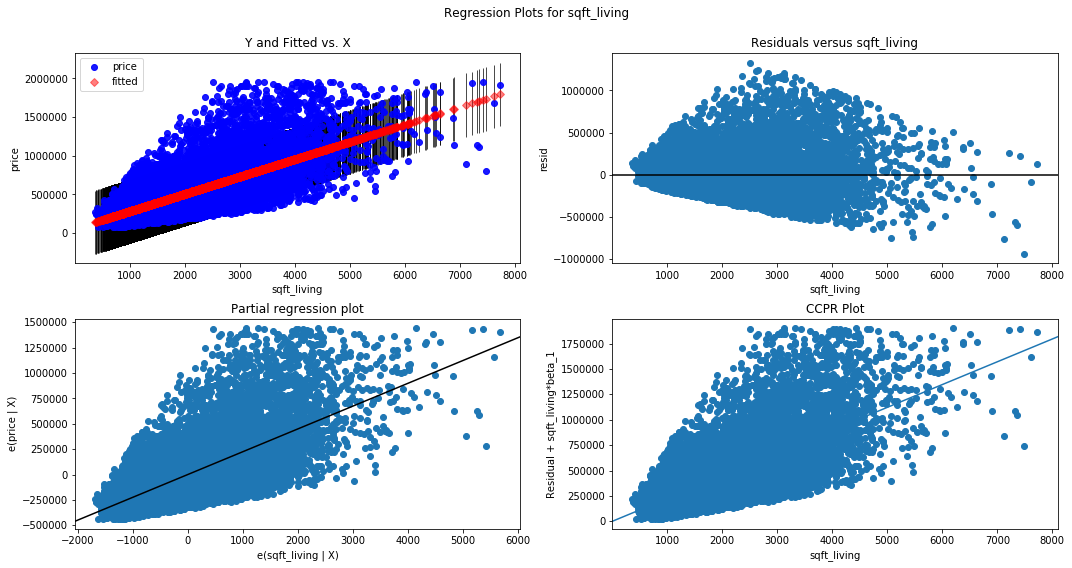

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


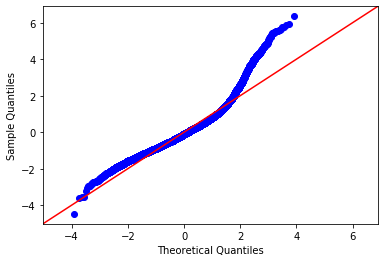

In [390]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_living': [df.sqft_living.min(), df.sqft_living.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.25765215401678143
Intercept    111508.817838
bathrooms    193845.888862
dtype: float64


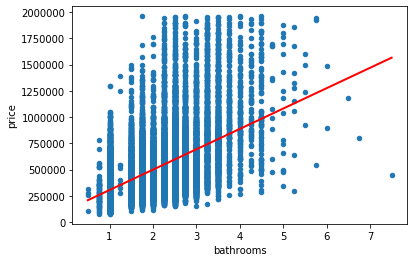

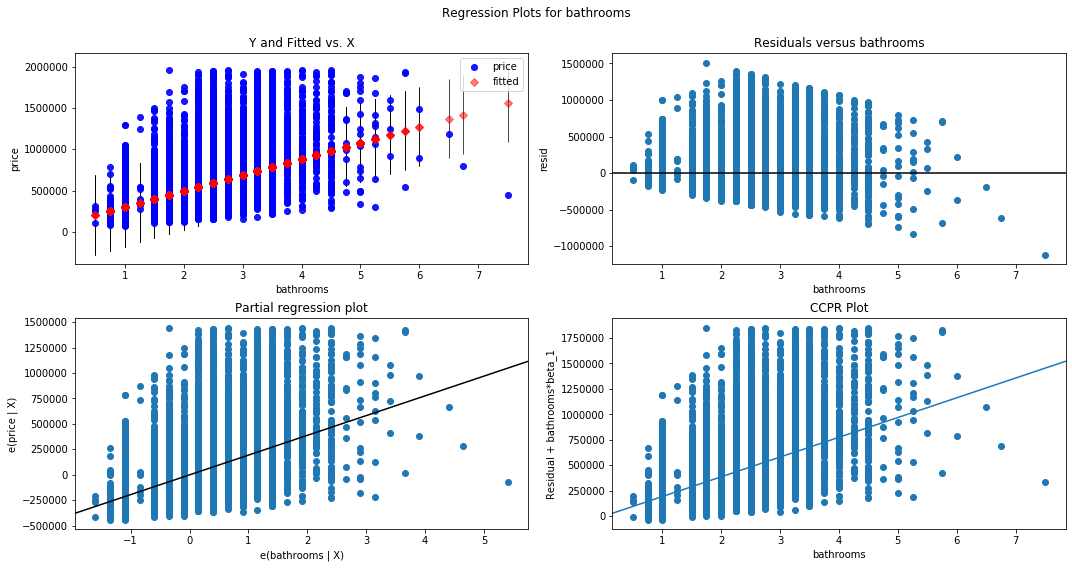

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


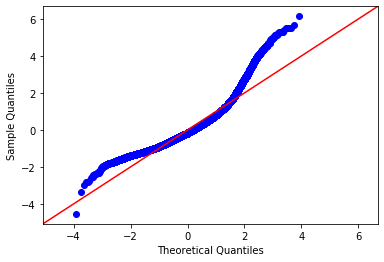

In [392]:
f = 'price~bathrooms'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bathrooms': [df.bathrooms.min(), df.bathrooms.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='bathrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.07939243950679753
Intercept        466034.390734
sqft_basement       187.596030
dtype: float64


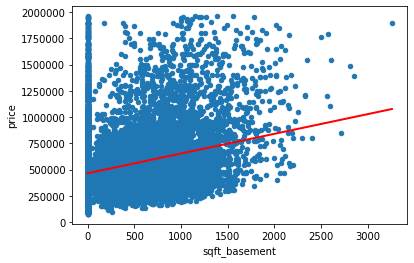

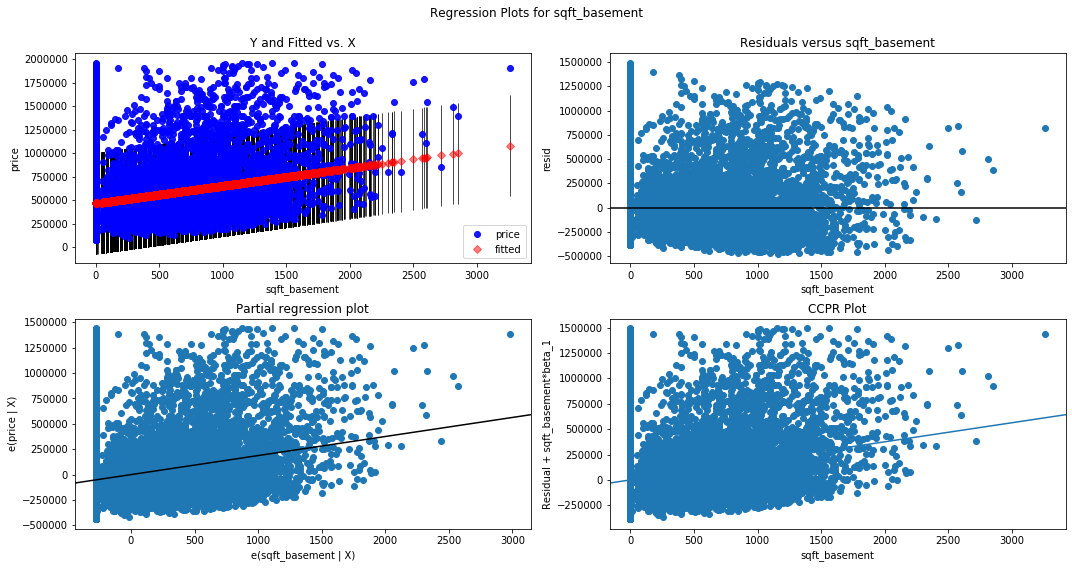

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


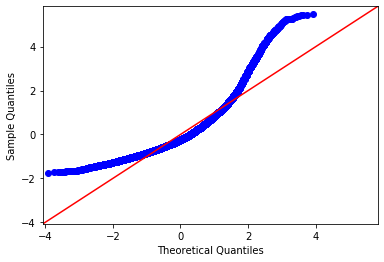

In [394]:
f = 'price~sqft_basement'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_basement': [df.sqft_basement.min(), df.sqft_basement.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_basement', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.002083310448225628
Intercept    2.435655e+07
zipcode     -2.430538e+02
dtype: float64


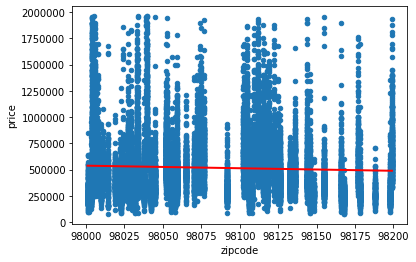

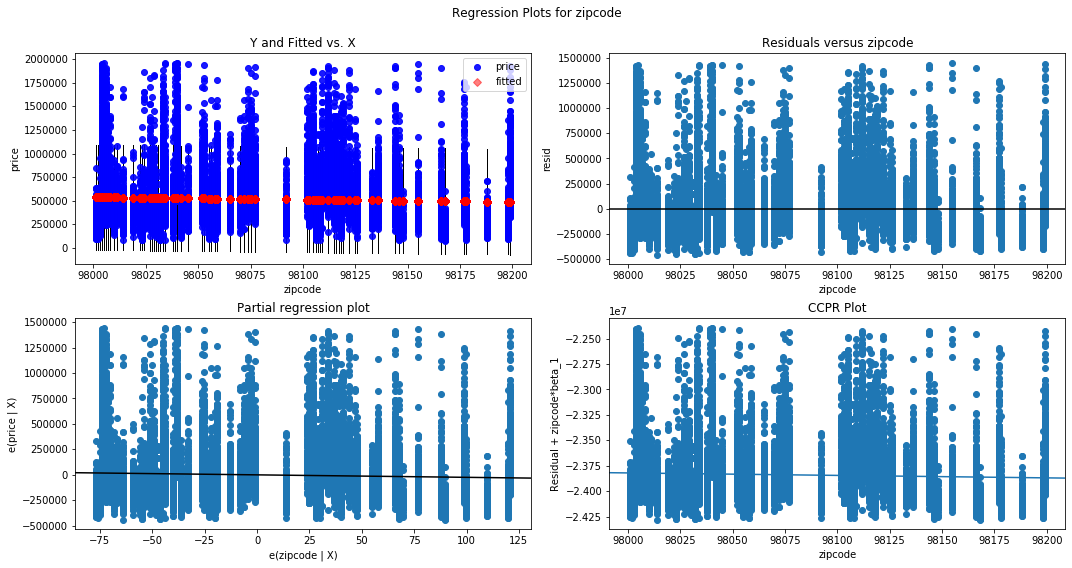

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


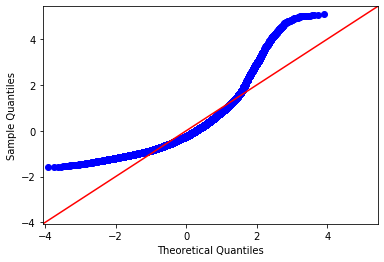

In [396]:
f = 'price~zipcode'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'zipcode': [df.zipcode.min(), df.zipcode.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='zipcode', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "zipcode", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

R-Squared: 0.10403493835924071
Intercept    174215.931999
bedrooms     102348.574257
dtype: float64


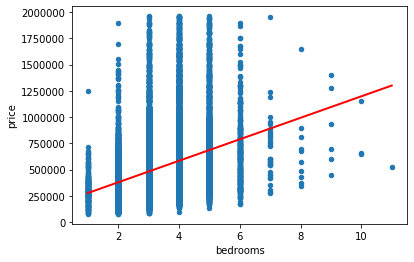

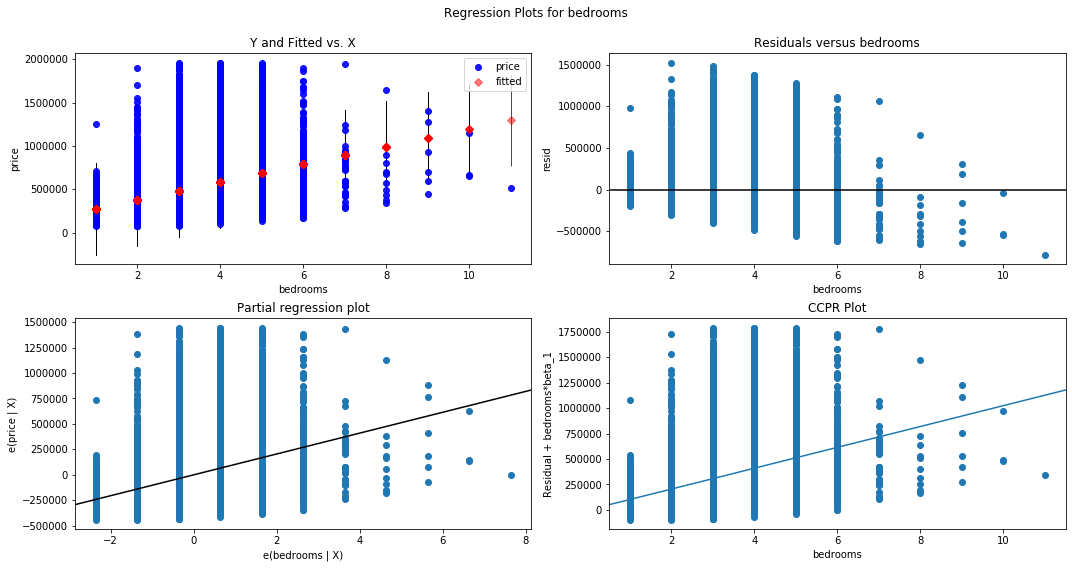

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


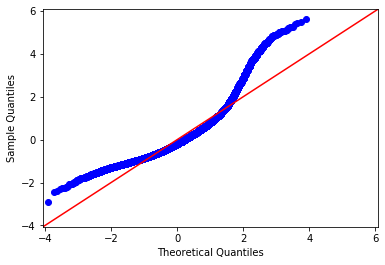

In [398]:
f = 'price~bedrooms'
model = smf.ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bedrooms': [df.bedrooms.min(), df.bedrooms.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='bedrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## 7.a. Preliminary analysis
As preliminary analysis, sqft_living, sqft_above, bathrooms  are among the features best performing for linear regression  model.
Other variables had non-linear relationship explaned by low r-squared.

# 8. Multiple linear regression model 
Multiple linear regression is a model for predicting the value of one dependent variable based on two or more independent variables.

## 8.a. Baseline model using statsmodel
In this first modeling attempt we push all parameters  to the model. We see how it works. Then we are going to drop some parameters according to the p-values and variance inflation factors.

In [399]:
#Multiple linear regression model with statsmodels

X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1111.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:07:07   Log-Likelihood:                -8096.7
No. Observations:               21380   AIC:                         1.646e+04
Df Residuals:                   21245   BIC:                         1.754e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3096      0.406     -3.224      0.001      -2.106      -0.513
sqft_living_log       0.2421      0.007     34.688      0.000       0.228       0.256
sqft_lot_log          0.1273      0.007     19.580      0.000       0.115       0.140
sqft_above_log        0.1101      0.007     16.476      0.000       0.097       0.123
yr_built_log         -0.0169      0.004     -3.760      0.000      -0.026      -0.008
sqft_living15_log     0.0926      0.004     21.327      0.000       0.084       0.101
sqft_lot15_log       -0.0328      0.006     -5.104      0.000      -0.045      -0.020
floors_1.5            0.0132      0.010      1.308      0.191      -0.007       0.033
floors_2.0           -0.0182      0.009     -2.038      0.042      -0.036      -0.001
floors_2.5           -0.0036      0.031     -0.114      0.909      -0.065       0.058
floors_3.0           -0.1490      0.019     -7.803      0.000      -0.186      -0.112
floors_3.5           -0.1616      0.146     -1.109      0.267      -0.447       0.124
condition_2           0.3032      0.072      4.227      0.000       0.163       0.444
condition_3           0.5775      0.067      8.650      0.000       0.447       0.708
condition_4           0.6487      0.067      9.709      0.000       0.518       0.780
condition_5           0.7742      0.067     11.513      0.000       0.642       0.906
bedrooms_2           -0.0275      0.027     -1.003      0.316      -0.081       0.026
bedrooms_3           -0.0707      0.028     -2.552      0.011      -0.125      -0.016
bedrooms_4           -0.0767      0.028     -2.693      0.007      -0.132      -0.021
bedrooms_5           -0.1200      0.030     -3.995      0.000      -0.179      -0.061
bedrooms_6           -0.1808      0.037     -4.930      0.000      -0.253      -0.109
bedrooms_7           -0.4273      0.070     -6.077      0.000      -0.565      -0.290
bedrooms_8           -0.3732      0.117     -3.197      0.001      -0.602      -0.144
bedrooms_9           -0.2582      0.164     -1.579      0.114      -0.579       0.062
bedrooms_10          -0.5264      0.211     -2.493      0.013      -0.940      -0.112
bedrooms_11           0.2403      0.357      0.674      0.501      -0.459       0.939
view_1.0              0.2211      0.021     10.713      0.000       0.181       0.262
view_2.0              0.2064      0.013     16.503      0.000       0.182       0.231
view_3.0              0.3454      0.017     20.046      0.000       0.312       0.379
view_4.0              0.5497      0.027     20.075      0.000       0.496       0.603
waterfront_1.0        0.8372      0.043     19.676      0.000       0.754       0.921
bathrooms_0.75        0.3906      0.183      2.133      0.033       0.032       0.749
bathrooms_1.0         0.3524      0.178      1.982      0.047       0.004

## 8.b. sklearn- Baseline Model
Before modelling, I will split he data into train and test. Model using only the train data. Test the model on test data. For model refinement, I will select features with hight coefficents that can negatively or positively influence the price. 

In [23]:
def filter_columns(df):
    '''Return DataFrame with only certain columns
    '''
    columns_to_keep = ['price',
        'bedrooms',
        'bathrooms', 
        'sqft_living',
        'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'
    ]

    return df[columns_to_keep]


In [24]:
df_filtered = filter_columns(df)
df_filtered.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [201]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21380 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21380 non-null  float64 
 1   bedrooms       21380 non-null  category
 2   bathrooms      21380 non-null  category
 3   sqft_living    21380 non-null  int64   
 4   sqft_lot       21380 non-null  int64   
 5   floors         21380 non-null  category
 6   waterfront     21380 non-null  category
 7   view           21380 non-null  category
 8   condition      21380 non-null  category
 9   grade          21380 non-null  category
 10  sqft_above     21380 non-null  int64   
 11  sqft_basement  21380 non-null  float64 
 12  yr_built       21380 non-null  int64   
 13  yr_renovated   21380 non-null  float64 
 14  zipcode        21380 non-null  category
 15  lat            21380 non-null  float64 
 16  long           21380 non-null  float64 
 17  sqft_living15  21380 non-null  

In [25]:
target = df_filtered['price']
features = df_filtered.drop('price', axis=1)

In [196]:
features.head()

bedrooms bathrooms  sqft_living  sqft_lot floors waterfront view condition  \
0        3      1.00         1180      5650    1.0        0.0  0.0         3   
1        3      2.25         2570      7242    2.0        0.0  0.0         3   
2        2      1.00          770     10000    1.0        0.0  0.0         3   
3        4      3.00         1960      5000    1.0        0.0  0.0         5   
4        3      2.00         1680      8080    1.0        0.0  0.0         3   

  grade  sqft_above  sqft_basement  yr_built  yr_renovated zipcode      lat  \
0     7        1180            0.0      1955           0.0   98178  47.5112   
1     7        2170          400.0      1951        1991.0   98125  47.7210   
2     6         770            0.0      1933           0.0   98028  47.7379   
3     7        1050          910.0      1965           0.0   98136  47.5208   
4     8        1680            0.0      1987           0.0   98074  47.6168   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
1 -122.319           1690        7639  
2 -122.233           2720        8062  
3 -122.393           1360        5000  
4 -122.045           1800        7503

In [26]:
#Split the data into training and test sets. Set the seed to 42 and the test_size to 0.25
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [27]:
# Transform with MinMaxScaler, I used the MinMaxScaler to scale the training set.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
#Transform the test data (X_test) using the same scaler:
X_test_scaled = scaler.transform(X_test)

#### Baseline Model 

In [29]:
#Fit a regression model to the training data
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linreg.coef_

array([-177534.16001614,  212546.62793383,  456457.40389517,
        353445.31345925,   70007.61378   ,  304679.74801362,
        187564.84208087,  114947.86171879,  819454.68134789,
        325533.1706828 ,  116172.06258861, -261647.03175563,
         49463.90321689,  -89655.58395639,  360854.40707749,
       -185063.18602069,  261758.41506393, -237703.04748898])

In [31]:
linreg.intercept_

-251320.09667274018

In [483]:
pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns= features.columns)

bedrooms      bathrooms    sqft_living       sqft_lot       floors  \
0 -177534.160016  212546.627934  456457.403895  353445.313459  70007.61378   

      waterfront           view      condition          grade     sqft_above  \
0  304679.748014  187564.842081  114947.861719  819454.681348  325533.170683   

   sqft_basement       yr_built  yr_renovated       zipcode            lat  \
0  116172.062589 -261647.031756  49463.903217 -89655.583956  360854.407077   

            long  sqft_living15     sqft_lot15  
0 -185063.186021  261758.415064 -237703.047489

#### Model to make predictions on both the training and test sets:

In [468]:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)

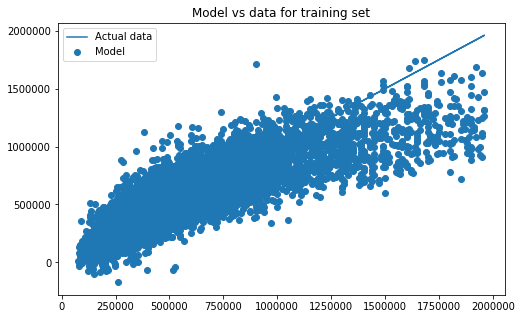

In [469]:
# vertical distance between the points and the line denote the errors
#Plot predictions for the training set against the actual data:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

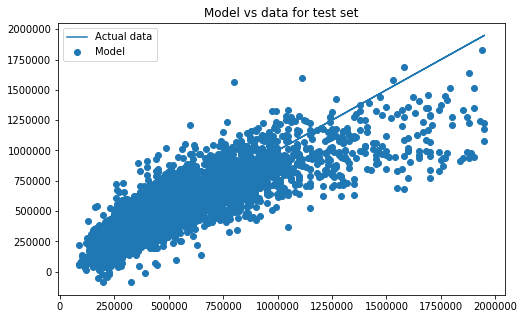

In [470]:
#Plot predictions for the test set against the actual data:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

In [471]:
# Make a prediction with cross validation (cv)
scores = cross_val_score(linreg, X_train, y_train)

scores.mean(), scores.std()

(0.7167860536786433, 0.008310682108915357)

In [481]:
mean_squared_error(y_train, lm_train_predictions)
r2_score(y_train, lm_train_predictions)

0.7178885833452935

In [32]:
#K-fold cros validation
# train {K} linear regression models on the data, with each linear model using a different section of data as the test set,
#and all other sections combined as the training set.
# then average the individual results frome each of these linear models to get a Cross-Validation MSE.
#perform 5-fold cross-validation to get the mean squared error through scikit-learn.

scores = cross_val_score( linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
          

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([156203.49062643, 148178.08376976, 154577.0397996 , 154540.56951064,
       150660.46849994, 150647.01902292, 158600.85033595, 152671.14655593,
       145374.48106365, 140238.66931809])

151169.18185029193

5180.177432405825

In [207]:
#Bias
def bias(y, y_hat):
    return np.mean(y_hat - y)

In [210]:
#Variance
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [211]:
#Calculate bias and variance
# Bias and variance for training set 
b = bias(y_train, lm_train_predictions) 
v =variance(lm_train_predictions) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 7.000165469630842e-11 
Train variance: 57967332005.25546


In [212]:
# Bias and variance for test set 
b = bias(y_test, lm_test_predictions) 
v = variance(lm_test_predictions) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: -831.4950545169168 
Test variance: 59263212959.64935


#### Baseline Model comments
This model fit scores is good of 0.72 with standard deviation of 0.008. The mean rmse is 151169 and rmse standard deviation of 5180. However, there are too many features and it needs refinement.


# 9. Model 1- Predict Price Model

In [149]:
#After couple model refinements and selection of high coeffient features, and removed sqft_living for multicolleanitry purposes.
#I Selected 2 features only, with the higest coefficients
#Model refinement
columns_to_keep = [ 
        'grade', 'sqft_above', 'lat'
       ]
    


       
       
        
        
features=df[columns_to_keep]
target=df['price']
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
#coefficients
display(linreg.coef_)
display(linreg.intercept_)

array([1052839.67541378,  616309.5556943 ,  404501.86629778])

-406984.4525333403

In [151]:
pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns= features.columns)

grade     sqft_above            lat
0  1.052840e+06  616309.555694  404501.866298

In [152]:
lm_train_predictions = linreg.predict(X_train_scaled)
SS_Residual = np.sum((y_train-lm_train_predictions )**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.5716835982610367

In [153]:
scores = cross_val_score(linreg, X_train, y_train)

scores.mean(), scores.std()

(0.5714873418243089, 0.008001081690401939)

In [154]:
#K-fold cross validation

scores = cross_val_score( linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
          

rmse_scores = np.sqrt(-scores)

display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([192716.16938402, 179981.80805965, 179496.81856693, 189266.85022533,
       182474.95178642, 188394.1579758 , 195813.06121617, 191979.78493583,
       185815.66861199, 173225.42222814])

185916.4692990279

6690.704310712026

In [155]:
# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)

In [156]:
#residuals
resid = lm_test_predictions - y_test
resid

10391     -1800.094733
12559     10365.407833
7540      65386.355320
10860     60561.463196
15427   -251024.056350
             ...      
3974     233398.195170
10220    119126.098990
945      -12993.790580
9906    -177742.514763
18760   -218659.525704
Name: price, Length: 5345, dtype: float64

In [157]:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

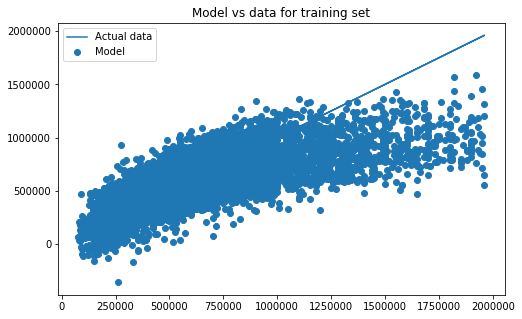

In [158]:
# vertical distance between the points and the line denote the errors
#Plot predictions for the training set against the actual data:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

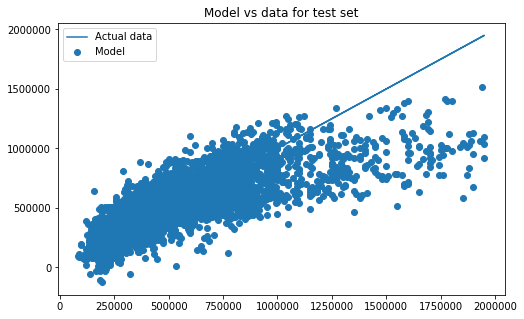

In [148]:
#Plot predictions for the test set against the actual data:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

In [159]:
train_mse = mean_squared_error(y_train, lm_train_predictions)
test_mse = mean_squared_error(y_test,lm_test_predictions)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 34585254089.43131
Test Mean Squarred Error: 34223581362.694286


#### Model 1- Predict Price Model comments
This is a good model with 2 features grade and sqft_above with mean rmse of 185916, rmse standard deviation of 6690  and fit score of 0.57
.

# 10. Model 2 - Home Interior Model

In [35]:
#Initial features input into the model for internal home features,  [ 'bedrooms',bathrooms','sqft_living','sqft_lot',
#'floors',  'condition', 'grade', 'sqft_above',  'sqft_basement', 'yr_renovated' ,'sqft_living15']   
#inorder to answer the question, Does home interior features affect the price sale?
#Model 2 for home interior features
#Model refinement, keep 2 home interior features with the highest coefficients after couple model refinements.

columns_to_keep = [ 
        'sqft_living',
        
          'grade', 
      
      ]
   
features=df[columns_to_keep]
target=df['price']
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [549]:
#coefficients

display(linreg.coef_)
display(linreg.intercept_)
pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns= features.columns)

array([937246.96873716, 883375.60203995])

-148422.63626300823

sqft_living         grade
0  937246.968737  883375.60204

In [550]:
lm_train_predictions = linreg.predict(X_train_scaled)
SS_Residual = np.sum((y_train-lm_train_predictions )**2)
SS_Total = np.sum((y-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.8932371674088216

In [551]:
scores = cross_val_score(linreg, X_train, y_train)

scores.mean(), scores.std()

(0.5262447018503691, 0.005727569627331013)

In [36]:
#10-fold cross validation

scores = cross_val_score( linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
          

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([202129.01637213, 190284.60563276, 191365.34560495, 201400.81098047,
       193290.69738204, 196137.66038432, 200967.77160241, 200901.92576441,
       195101.33269128, 183201.30014586])

195478.04665606347

5820.964052264255

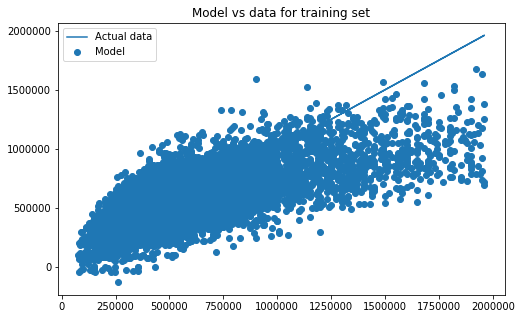

In [552]:
#model to make predictions on both the training and test sets:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)
# vertical distance between the points and the line denote the errors
#model to make predictions on both the training and test sets:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

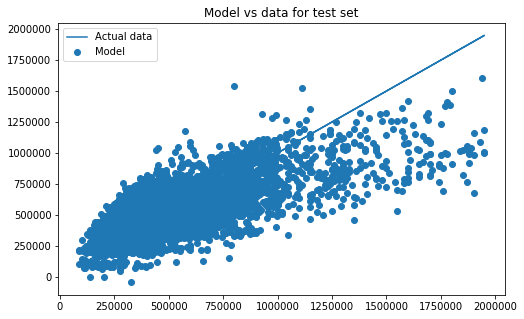

In [553]:
#model to make predictions on both the training and test sets:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

In [554]:
#train residuals

resid_train = lm_train_predictions - y_train
resid_train

11447    -57987.503981
7294     332433.594515
5566      40255.668695
9818     123584.485404
2032      56670.129436
             ...      
11387    -69905.557964
12074    -10489.352989
5448      78670.129436
872     -128766.263167
15945     79571.209895
Name: price, Length: 16035, dtype: float64

In [555]:
#test residuals

resid_test = lm_test_predictions - y_test
#resid_test

10391     40440.127495
12559     69623.116426
7540      32042.535505
10860      6740.544178
15427   -157524.560360
             ...      
3974     390158.428571
10220    117307.849591
945      166537.472393
9906    -290046.322631
18760    -89383.795693
Name: price, Length: 5345, dtype: float64

In [556]:
#train and test mean squared error
train_mse = mean_squared_error(y_train, lm_train_predictions)
test_mse = mean_squared_error(y_test,lm_test_predictions)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 38223288503.34336
Test Mean Squarred Error: 38288073770.42306


#### Model 2 for home interior comments
This is a good model with only 2 features grade and sqft_living with mean rmse 195478, standard deviation rmse of 5820
and fit score of 0.52.

# 11. Model 3 - Exterior Geographic Features Model

In [94]:
#After couple model refinemnts of selecting  features with highest coefficients, I selcted only 3 features with highest coefficients
#Model refinement

columns_to_keep =['sqft_lot', 'view',
        'lat']
       
        
       
        
         
    
features=df[columns_to_keep]
target=df['price']
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#coefficients
display(linreg.coef_)
display(linreg.intercept_)
pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns= features.columns)

array([1153399.45466326,  536252.00264865,  470349.50326379])

173216.25029527873

sqft_lot           view            lat
0  1.153399e+06  536252.002649  470349.503264

In [96]:
lm_train_predictions = linreg.predict(X_train_scaled)
SS_Residual = np.sum((y_train-lm_train_predictions )**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.2620998111976154

In [97]:
scores = cross_val_score(linreg, X_train, y_train)

scores.mean(), scores.std()

(0.2620760345034291, 0.02037139476047135)

In [98]:
# 10-fold cross validation
scores = cross_val_score( linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
          

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([251305.8274366 , 235154.85306336, 239875.71818246, 256775.65931564,
       247996.29229702, 248274.22442837, 255039.1161613 , 246327.10195422,
       235511.77245476, 224510.71787373])

244077.12831674647

9618.619354791474

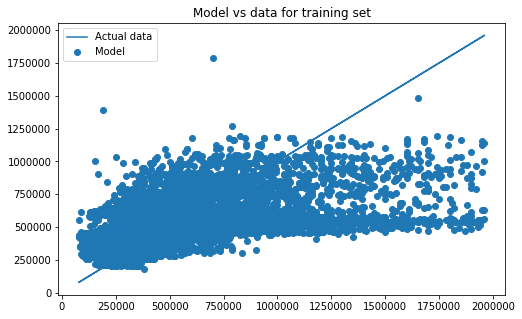

In [99]:
#model to make predictions on both the training and test sets:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)
# vertical distance between the points and the line denote the errors
#model to make predictions on both the training and test sets:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

In [100]:
#train residuals
resid_train = lm_train_predictions - y_train
resid_train

11447    -51065.135745
7294     -57549.963834
5566     298715.465064
9818      54631.294583
2032     -77934.417359
             ...      
11387    -91596.208322
12074    191083.796798
5448     170588.037002
872       40828.705617
15945    385013.191001
Name: price, Length: 16035, dtype: float64

In [101]:
#test residuals
resid_test = lm_test_predictions - y_test
resid_test

10391     11256.098149
12559    -41812.613023
7540     304642.876006
10860    311911.651715
15427    206861.433110
             ...      
3974     -75762.786065
10220     74359.058770
945       47903.659938
9906     -79130.527973
18760     94142.083784
Name: price, Length: 5345, dtype: float64

In [102]:
#train and test mean square error
train_mse = mean_squared_error(y_train, lm_train_predictions)
test_mse = mean_squared_error(y_test,lm_test_predictions)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 59583208625.111694
Test Mean Squarred Error: 60620443237.071495


#### Model 3 for home exterior geographic features comments
This model fit did not perform well due to low fit score of 0.29. The mean rmse 244077 and rmse standard deviation of 9618.  It is no the best model to work with.
The most important geographic features that can influence the price sale: location, view and sqft_lot.


# 12.  Model 4- Increase Sale Price Model
Select the best performing features from all above models (i.e.geographic models, interior features models, predict price model).

In [164]:
#Select  the best performing features that can contribure to the increase in sale price
#Model refinement
columns_to_keep =['sqft_living', "view",
        
       
        "grade", "lat", "waterfront"
       
    ]
   
features=df[columns_to_keep]
target=df['price']
X_train , X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
#coefficients
display(linreg.coef_)
display(linreg.intercept_)
pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns= features.columns)

array([932844.7413264 , 258645.77822268, 728763.25652462, 402101.96174408,
       314710.88668089])

-345138.354961516

sqft_living           view          grade            lat     waterfront
0  932844.741326  258645.778223  728763.256525  402101.961744  314710.886681

In [165]:
lm_train_predictions = linreg.predict(X_train_scaled)
SS_Residual = np.sum((y_train-lm_train_predictions )**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared

0.6622268867614638

In [166]:
scores = cross_val_score(linreg, X_train, y_train)

scores.mean(), scores.std()

(0.6617262283021297, 0.011798785131910423)

In [168]:
#10-fold cross validation

scores = cross_val_score( linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
          

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([173392.14959517, 161056.77233499, 166206.42368662, 169035.16463827,
       168190.49557708, 165176.42220136, 169775.38883922, 170612.38724895,
       156960.34692124, 151628.66623493])

165203.42172778238

6412.828013631315

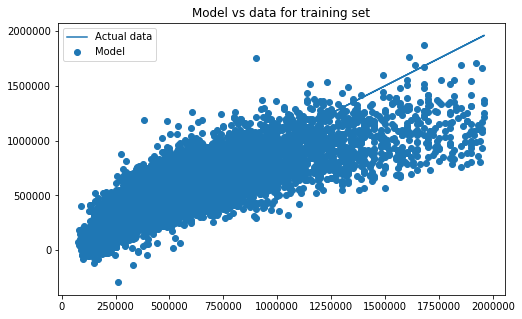

In [169]:
#model to make predictions on both the training and test sets:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)
# vertical distance between the points and the line denote the errors
#model to make predictions on both the training and test sets:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

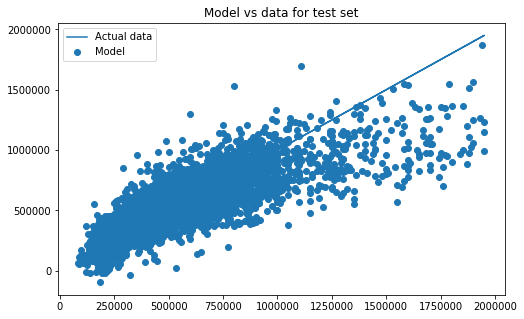

In [170]:
# vertical distance between the points and the line denote the errors
#model to make predictions on both the training and test sets:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

In [171]:
#train and test residuals
resid_train = lm_train_predictions - y_train
resid_train
resid_test = lm_test_predictions - y_test
resid_test

10391    -22597.464569
12559     33783.715655
7540      33464.859689
10860     23822.094331
15427     31500.824708
             ...      
3974     171230.475768
10220     38297.274518
945       11235.794551
9906    -219499.027955
18760    100123.807174
Name: price, Length: 5345, dtype: float64

In [172]:
#train and test mean squared error
train_mse = mean_squared_error(y_train, lm_train_predictions)
test_mse = mean_squared_error(y_test,lm_test_predictions)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 27274157371.75665
Test Mean Squarred Error: 28111994936.187656


#### Model 4-Increase Sale Price Model comments
This is an excellent model with mean rmse of 165203 and rmse standard deviation of 6412 and fit score of 0.66 and standard deviation of 0.008.
Most important features to predict sale price: sqft_living, grade,  location and  view.

# 13.  Data interpretation

## 13.a. Model 1- Sale Price Prediction
The most important two features to predict the price sale are: square footage of the house , grade (how good and well maintained is the house condition).
Other impotant features: location (lat, long), view (does the home have a geographic view), condition of the house, and the number of floors.
    
    

### 13.a.1. Visualization for the house square footage

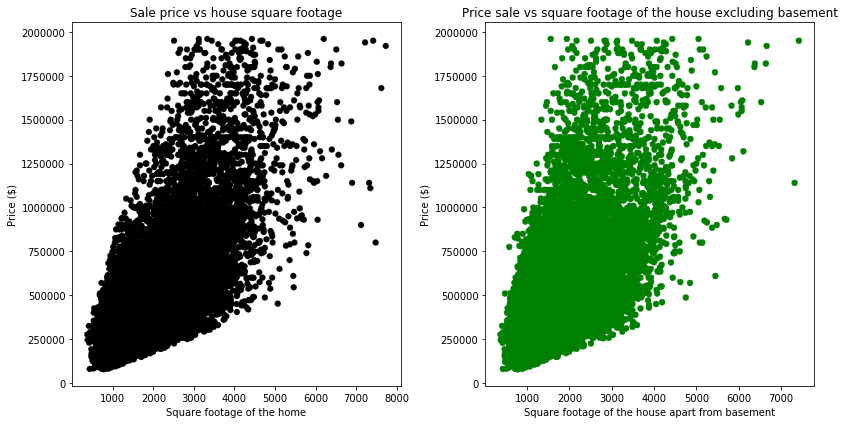

In [657]:
new_figure, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
new_figure.set_tight_layout(True)

ax1.scatter(x, y, color='black', linewidth=0.5, linestyle = ':')
            
ax2.scatter(z,y, color='green', linewidth=0.5, linestyle = '-.')

ax1.set_xlabel('Square footage of the home')
ax1.set_ylabel('Price ($)')
ax1.set_title ('Sale price vs house square footage')

ax2.set_xlabel('Square footage of the house apart from basement')
ax2.set_ylabel('Price ($)')
ax2.set_title ('Price sale vs square footage of the house excluding basement');

### 13.a.2.  Visualization for the house grade

Text(0, 0.5, 'Sale Price ($)')

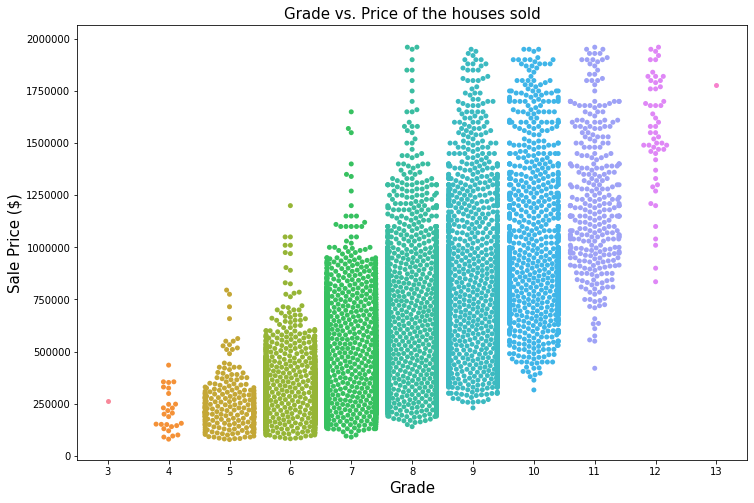

In [721]:
fig=plt.figure(figsize=(12,8))
sns.swarmplot(x='grade', y='price', data=df);
plt.title('Grade vs. Price of the houses sold', fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel('Sale Price ($)', fontsize=15)

## 13.b.  Model 3- Important geographic features vs price sale.
The most two important features are square foot of the whole house lot and view (if the home has a beautiful landscape view).
By descending order: square foot of the whole house lot, view (if the home has a beautiful landscape view),location, and  waterfront (if the home is facing a lake, river..ect).

### 13.b.1.  Visualization for the location of the house

<function matplotlib.pyplot.show(*args, **kw)>

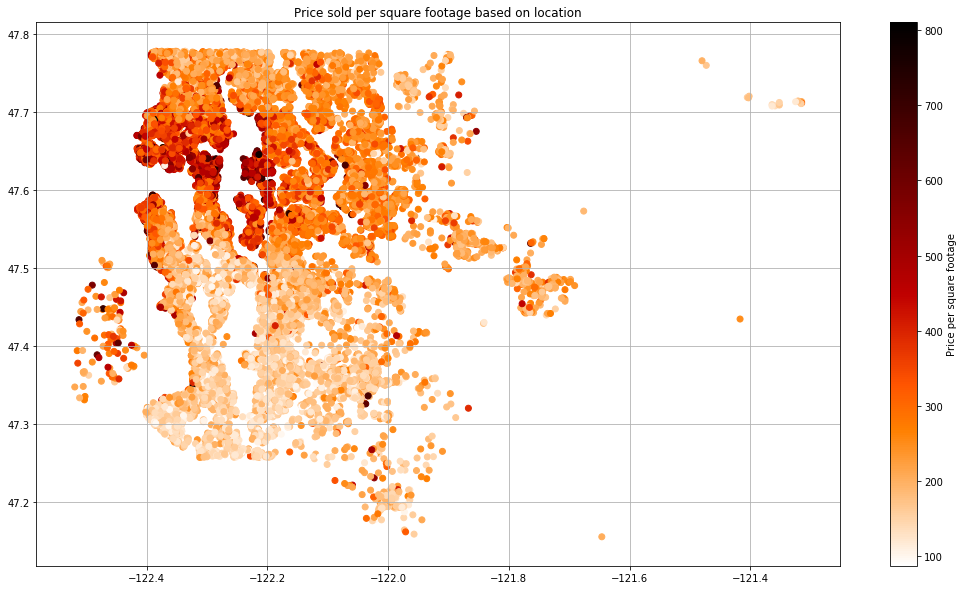

In [688]:
plt.figure(figsize=(18,10))
plt.scatter(df['long'], df['lat'], c=df['price']/df['sqft_living'], cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Price per square footage')
plt.grid(which='both')
plt.title('Price sold per square footage based on location')
plt.show

### 13.b.2  Visualization for house view

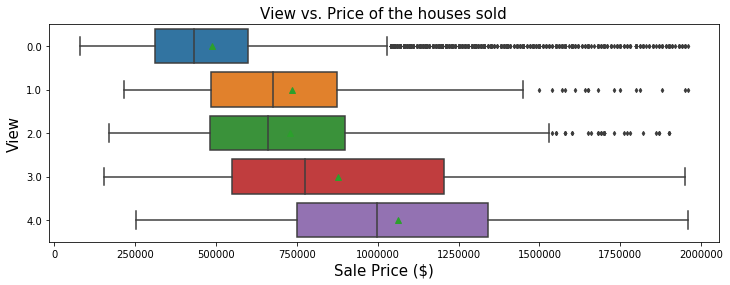

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'view', 
            x = 'price', 
            data = df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.xlabel("Sale Price ($)", fontsize=15)
plt.ylabel('View', fontsize=15)
plt.title('View vs. Price of the houses sold', fontsize=15)
plt.show()

## 13.c. Model 2- Important house interior features vs price sale
The most important two features are grade ( overall grade of the housing unit) and square footage of the home.
Therefore, the most important features to predict the price sale based on home interior features are by descending order: Grade ( overall grade of the housing unit), square footage of the home, total floors in the house, the square footage of interior housing living space for the nearest 15 neighbors, how good is the overall conditon of the house, square footage of the basement and the year when the house is renovated.

### 13.c.1.  Visualization for the house grade

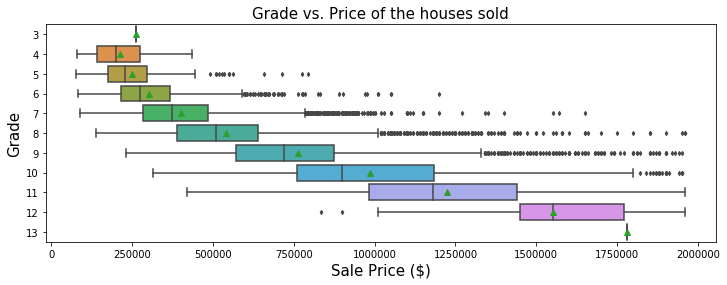

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', 
            x = 'price', 
            data = df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.title('Grade vs. Price of the houses sold', fontsize=15)
plt.xlabel("Sale Price ($)", fontsize=15)
plt.ylabel('Grade', fontsize=15)
plt.show()

### 13.c.2. Visualization of the square footage of the house

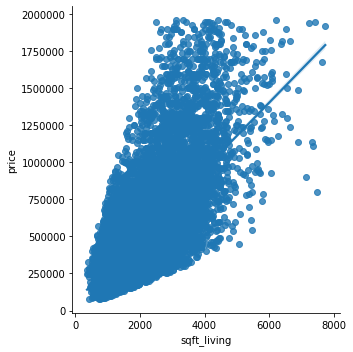

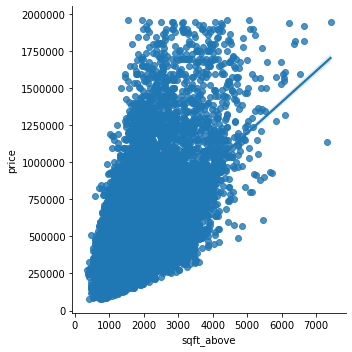

In [647]:
sns.lmplot(x="sqft_living", y="price",data=df,)
sns.lmplot(x="sqft_above", y="price", data=df)

### 13.c.3.  Vsualization of year renovation of the house

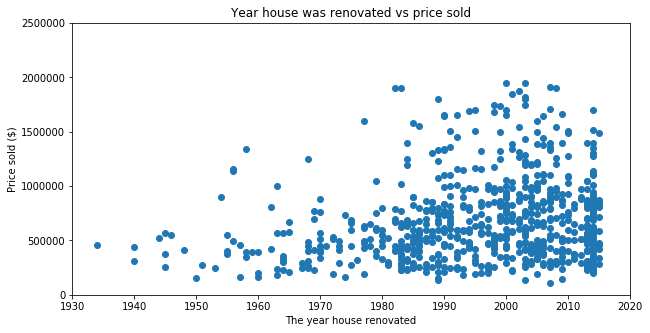

In [686]:
x=df['yr_renovated']
y=df['price']

new_figure = plt.figure(figsize=(10, 5))
ax = new_figure.add_subplot(111)

plt.scatter(x, y, label='Sample Data')
ax.set_xlim(1930, 2020), ax.set_ylim(0,2500000)
ax.set_xlabel('The year house renovated')
ax.set_ylabel('Price sold ($)')
ax.set_title('Year house was renovated vs price sold');
plt.show()

## 13.d. Model 4- Important features which  increase the price sale
The most two important features are square footage of house a and overall grade given to the housing unit, based on King County grading system.
Therefore, the most important features which can potentially increase the price sale:  square footage of house apart from basement, overall grade given to the housing unit, based on King County grading system, latitude coordinate (location). 
Other features: square footage of the basement, house which has a view to a waterfront, If the house has a view or not, How good is the overall condition.
 

### 13.d.1. Visualization of the square footage of the house

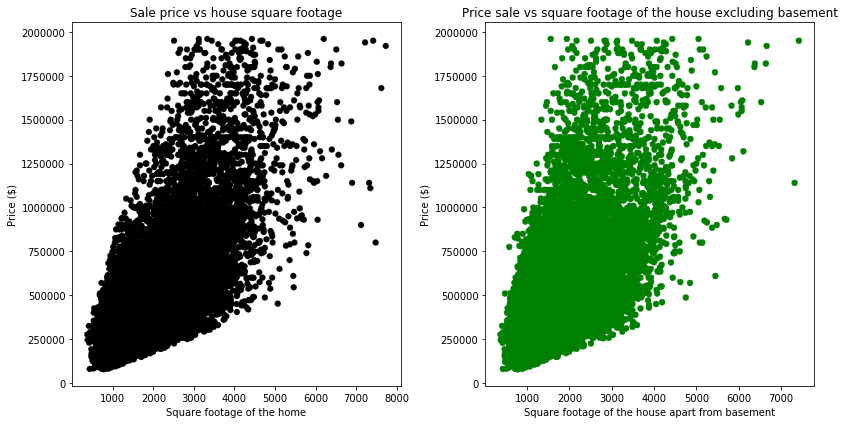

In [690]:
x=df['sqft_living']
y=df['price']
z=df['sqft_above']
new_figure, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
new_figure.set_tight_layout(True)

ax1.scatter(x, y, color='black', linewidth=0.5, linestyle = ':')
            
ax2.scatter(z,y, color='green', linewidth=0.5, linestyle = '-.')

ax1.set_xlabel('Square footage of the home')
ax1.set_ylabel('Price ($)')
ax1.set_title ('Sale price vs house square footage')

ax2.set_xlabel('Square footage of the house apart from basement')
ax2.set_ylabel('Price ($)')
ax2.set_title ('Price sale vs square footage of the house excluding basement');

### 13.d.2. Visualization of the house grade

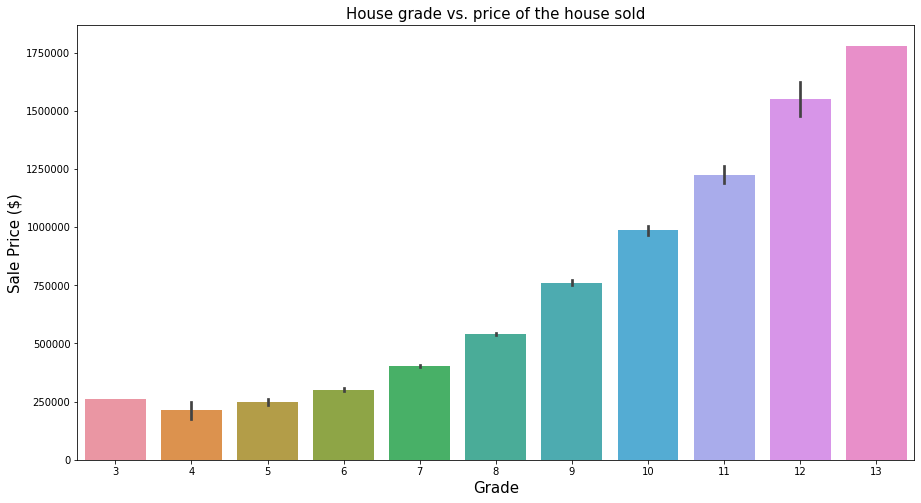

In [717]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=df, y='price', x='grade')
plt.title('House grade vs. price of the house sold', fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel('Sale Price ($)', fontsize=15)
plt.show()

### 13.d.3. Visualization of the house latitude location

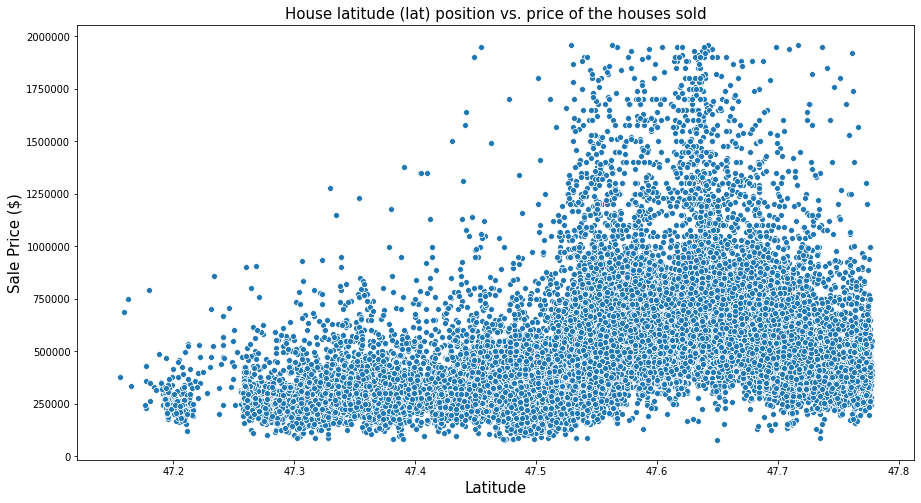

In [716]:

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, y='price', x='lat')
plt.title('House latitude (lat) position vs. price of the houses sold', fontsize=15)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel('Sale Price ($)', fontsize=15)
plt.show()

### 13.d.4 Visualization of the house view 

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\pandas\io\formats\format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


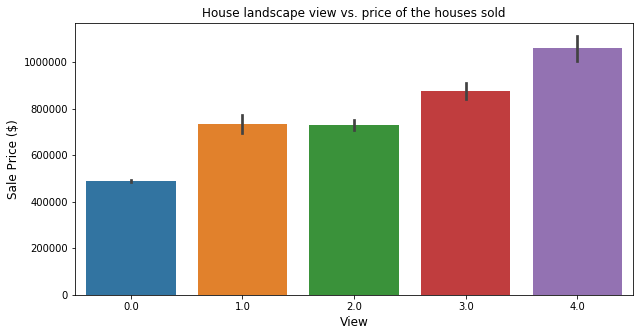

In [714]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='price', x='view')
plt.title('House landscape view vs. price of the houses sold', fontsize=12)
plt.xlabel("View", fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.show()

### 13.d.5. Visualization of the house waterfront

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\pandas\io\formats\format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


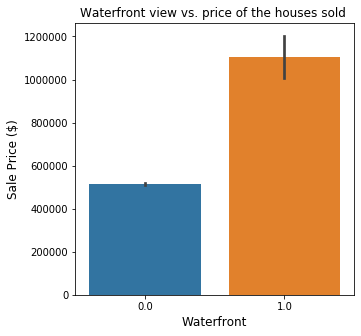

In [713]:

fig = plt.figure(figsize=(5, 5))
sns.barplot(data=df, y='price', x='waterfront')
plt.title('Waterfront view vs. price of the houses sold ', fontsize=12)
plt.xlabel("Waterfront", fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.show()

## 14. Conclusion

We answered the four questions by optimizing 4 multiple linear regression models. These models can give insights for specific house prediction.

The most important features to predict the sale price of the house in King County , Seattle are
square footage and the grade of the house.

The best  performing multiple regression model in this project is with 5 features. It has  mean  fit score of 0.66 and standard deviation of 0.008. The mean squared error of 165203 an standard deviation of mean square error of 6412.

The best  performing multiple regression model in this project with 2 features. It has  mean  fit score of 0.52 and standard deviation of 0.005. The mean squared error of 195478 an standard deviation of mean square error of 5820.

Other features that can increase the sale price i.e. location (which region the house is located in King County), waterfront for the house and a natural view for the house (i.e. overlooking a mountain, hill, valley, forest..ect).

Overall, according to our  models  to predict the price, the most precise features that can increase the sale price are: square footage of the house of the 15 closet neighbors, a house with two floors,  4 views, 1 waterfront, 5.25 bathrooms, grade 12 or 13 located in certion locations (zipcode 9814, 98011, 9802, 98033, 98102...ect).

More data in different years is needed to have better prediction in order to have better visualozations for the chage of the sale price with time. If time data is provided, we can predict if sale price increase/decrease by time and estimate the value increase or decrease of the properties with time in certain areas. This information is vital because it allows real estate investors to invest in the right properties that will have profits.

Other features are missing from the data, like school district, the education quality of the schooling system,  house upgrades (wood flooring, marble countertops, wood decoration, stone facade...ect). These features can influentially affect the sale price and thir incoporation into the model in essential for future consideration.